<a href="https://colab.research.google.com/github/NamanNavneet/MAJOR-PROJECT/blob/gh-pages/Covid_19_Pandemic_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **COVID-19_PANDEMIC_ANALYSIS_AND_PREDICTION** 


* # **MAJOR PROJECT** (**DS-05-BS2**)



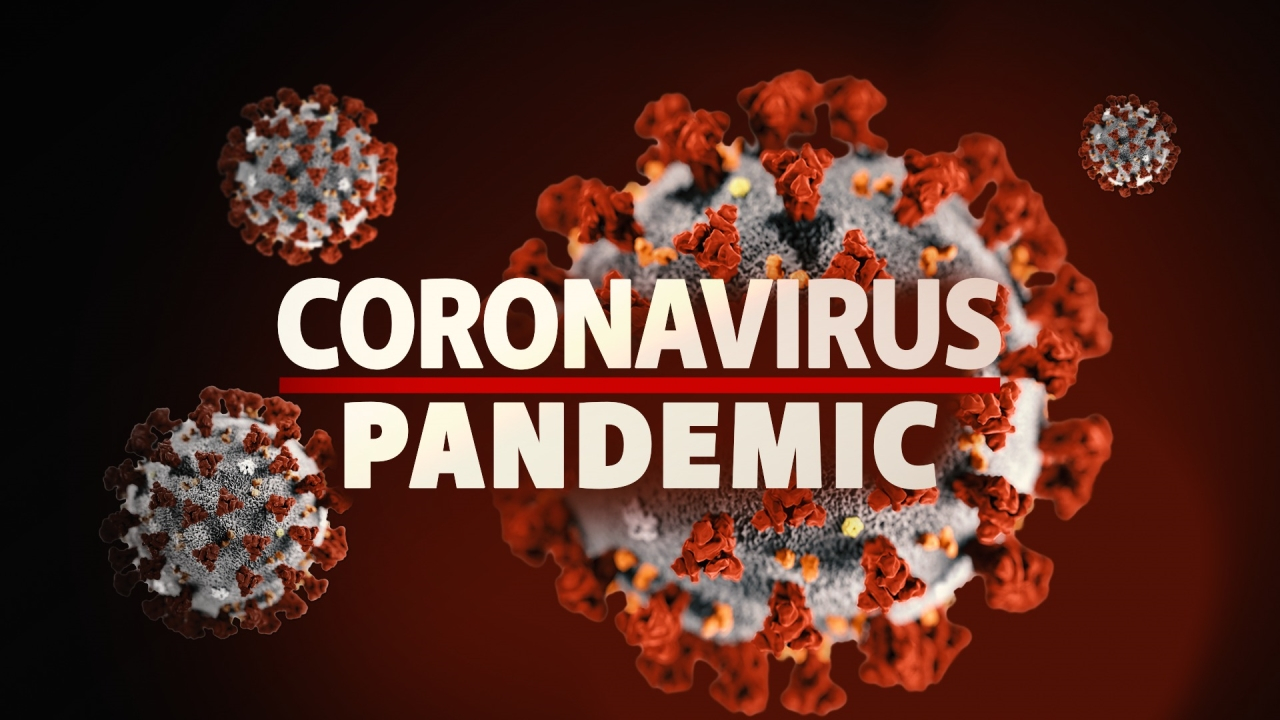

                                                      **Covid-19 Pandemic Analysis and Prediction**

**Forecasting Timeseries Data Using Facebook Fb Prophet**


1.   Installation
2.   Data Preproccessing With Time series and Location
3.   Model Fitting and Obtaining The Forecasts
4.   Plotting The Forecasts
5.   CrossValidation
6.   Computing Performance Matrics
7.   Visualize the Performance Metrics
8.   Case study Part 1              
Based On Age Group                                                                            
     A. Medium Aged Group Cases                                                                                                                                                           
     B. Age 65 Older
     
     C. Age 70 Older
9.   Case study Part 2                                                                            
     A. India                                                                                                                                                           
     B. United States 
10.   Conclusion
11.   Case study Part 3 (OPTIONAL)             
Based On New Dataset                                                                           
     A. New Cases                                                                                                                                                           
     B. New Vaccination
     
     C. New Death


---



**ON OVERALL THERE ARE 3 SECTIONS**

1.   **OVERVIEW**

    *   TOTAL_CASES
    *   TOTAL_VACCINATIONS
    *   TOTAL_DEATHS

Case Study Part I
2.   **BASED ON AGED GROUPS**

    *   MEADIAN_AGED
    *   AGED 65 OLDER
    *   AGED 70 OLDER

Case Study Part II
3.   **BASED ON COUNTRY**
    *   India
    *   United States

Case Study Part III (Optional)
4.   **Based On New Dataset**
    *   New Cases
    *   New Death
    *   New Vaccination



---








# 1. Installation






**CLICK HERE TO DOWNLOAD DATASET :-** [owid-covid-data2.csv](https://drive.google.com/file/d/11JbqT0vDnhPvIMkXKbuDDKGiexc4abc4/view?usp=sharing)

(*NOTE * Upload the Dataset in colab files or running directory*)





In [ ]:
#@title
!pip install ipython-autotime
%load_ext autotime
from google.colab import drive
drive.mount('/content/drive')

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
Mounted at /content/drive
time: 1min 6s (started: 2021-07-14 05:42:09 +00:00)


In [ ]:
              #  If this code give error try second
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/major project/owid-covid-data2.csv")
data
                             #  If code gives error then try this
                             #  data = pd.read_csv('/content/owid-covid-data2.csv'
                             #  data

iso_code continent  ... human_development_index excess_mortality
0          AFG      Asia  ...                   0.511              NaN
1          AFG      Asia  ...                   0.511              NaN
2          AFG      Asia  ...                   0.511              NaN
3          AFG      Asia  ...                   0.511              NaN
4          AFG      Asia  ...                   0.511              NaN
...        ...       ...  ...                     ...              ...
95489      ZWE    Africa  ...                   0.571              NaN
95490      ZWE    Africa  ...                   0.571              NaN
95491      ZWE    Africa  ...                   0.571              NaN
95492      ZWE    Africa  ...                   0.571              NaN
95493      ZWE    Africa  ...                   0.571              NaN

[95494 rows x 60 columns]

time: 1.76 s (started: 2021-07-14 05:45:33 +00:00)


In [ ]:
#If code gives error then try this
#data = pd.read_csv('/content/owid-covid-data2.csv')
#data

# 2. Data Preproccessing With Time series and Location

### A. COVID-19 TOTAL CASES


---



1. Covid-19 Total Cases data with respect to location

In [ ]:
import pandas as pd
df1 = data.rename(columns={data.columns[2]:'Location',data.columns[4]:'Number of Cases'})
df_new1 = df1[['Location','Number of Cases']]
df_new1.dropna(subset = ["Number of Cases"], inplace=True)
df_new1['Number of Cases'] = df_new1['Number of Cases'].astype(int)
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91893 entries, 0 to 95493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         91893 non-null  object
 1   Number of Cases  91893 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.1+ MB
time: 93.7 ms (started: 2021-07-14 05:45:45 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


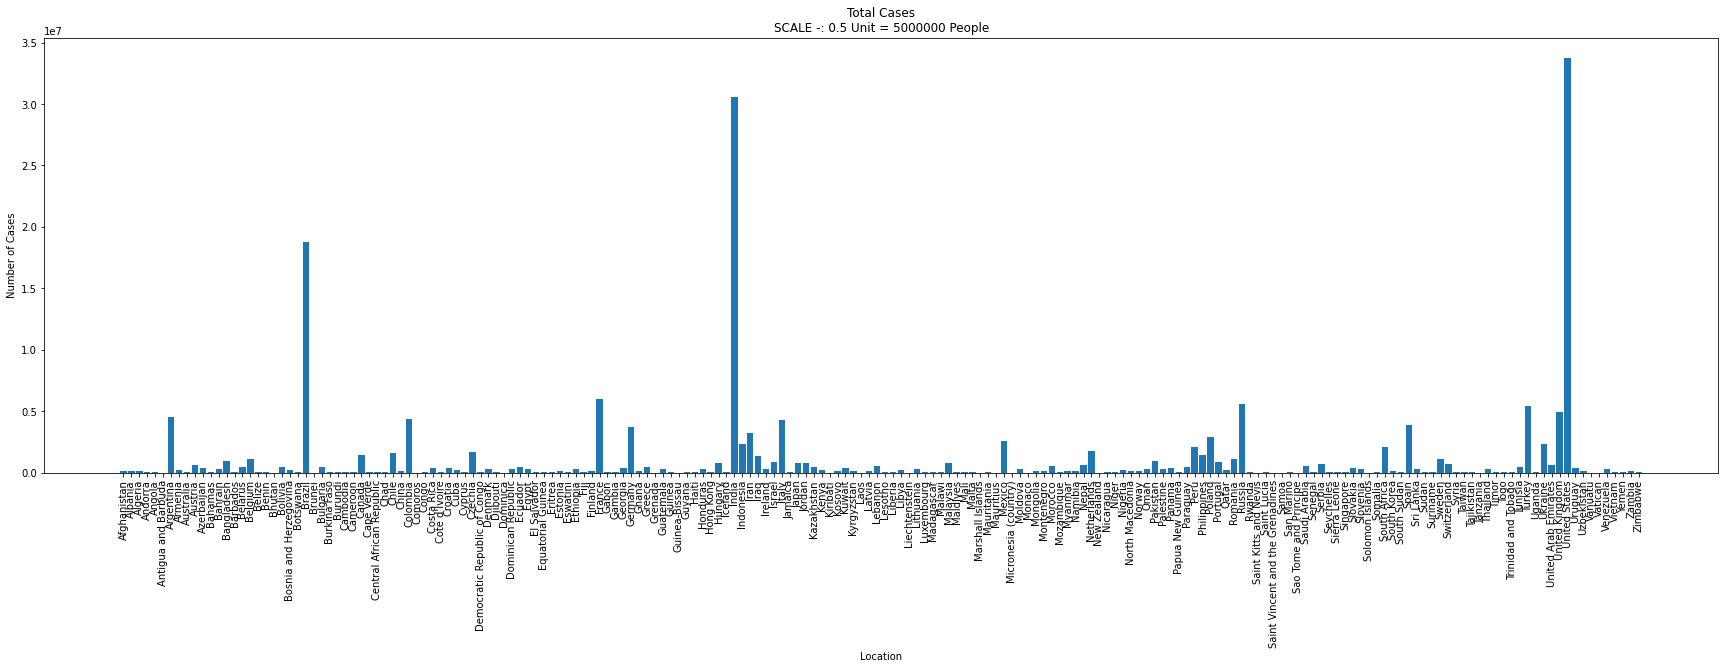

time: 2min 48s (started: 2021-07-14 05:45:46 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new1['Location'],df_new1['Number of Cases'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Cases\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Number of Cases')
plt.xlabel('Location')
plt.show()

2. Covid-19 Total Cases data with respect to Time

In [ ]:
import pandas as pd
df2 = data.rename(columns={data.columns[3]:'Date',data.columns[4]:'Number of Cases'})
df_new2 = df2[['Date','Number of Cases']]
df_new2.dropna(subset = ["Number of Cases"], inplace=True)
df_new2['Date'] = pd.to_datetime(df_new2['Date'])
df_new2['Number of Cases'] = df_new2['Number of Cases'].astype(int)
df_new2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91893 entries, 0 to 95493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             91893 non-null  datetime64[ns]
 1   Number of Cases  91893 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.1 MB
time: 143 ms (started: 2021-07-14 05:48:35 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

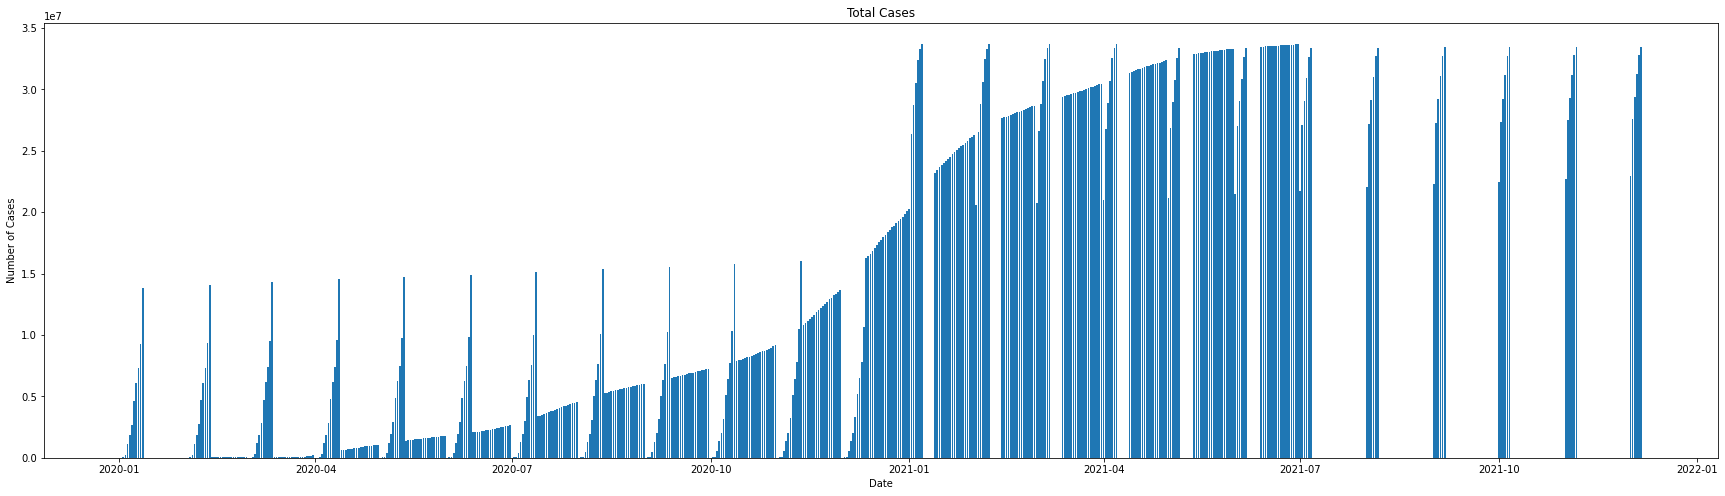

time: 3min 4s (started: 2021-07-14 05:51:37 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new2['Date'],df_new2['Number of Cases'])
plt.autoscale()
plt.title('Total Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.show()

### B. COVID-19 TOTAL DEATHS


---



1. Covid-19 Total Deaths data with respect to location

In [ ]:
import pandas as pd
df3 = data.rename(columns={data.columns[2]:'Location',data.columns[7]:'Number of Death'})
df_new3 = df3[['Location','Number of Death']]
df_new3.dropna(subset = ["Number of Death"], inplace=True)
df_new3['Number of Death'] = df_new3['Number of Death'].astype(int)
df_new3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81905 entries, 27 to 95493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Location         81905 non-null  object
 1   Number of Death  81905 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.9+ MB
time: 66.7 ms (started: 2021-07-13 18:00:12 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


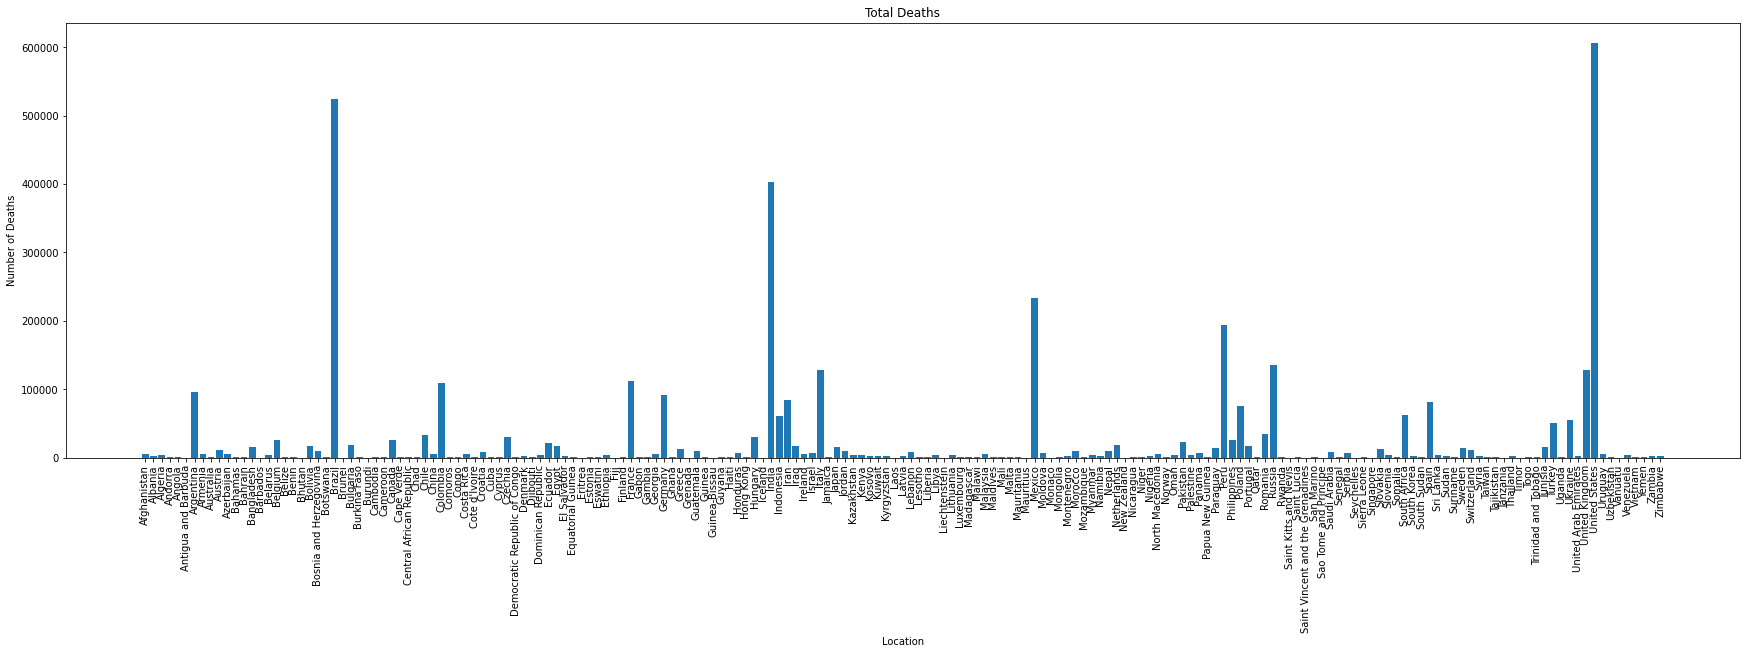

time: 2min 42s (started: 2021-07-13 18:00:12 +00:00)


In [ ]:
#Deaths With Respect To Location
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new3['Location'],df_new3['Number of Death'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('Location')
plt.show()

2. Covid-19 Total Deaths data with respect to Time

In [ ]:
import pandas as pd
df4 = data.rename(columns={data.columns[3]:'Date',data.columns[7]:'Number of Death'})
df_new4 = df4[['Date','Number of Death']]
df_new4.dropna(subset = ["Number of Death"], inplace=True)
df_new4['Date'] = pd.to_datetime(df_new4['Date'])
df_new4['Number of Death'] = df_new4['Number of Death'].astype(int)
df_new4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81905 entries, 27 to 95493
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             81905 non-null  datetime64[ns]
 1   Number of Death  81905 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.9 MB
time: 119 ms (started: 2021-07-13 18:02:55 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

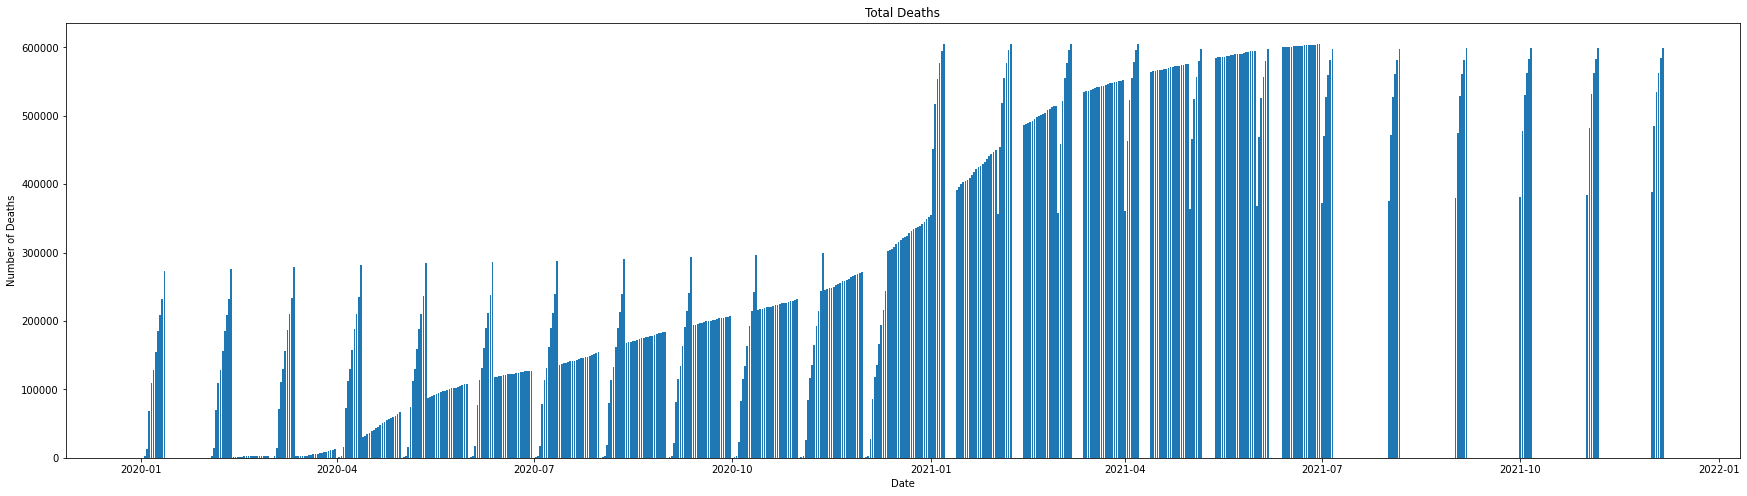

time: 2min 37s (started: 2021-07-13 18:02:55 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new4['Date'],df_new4['Number of Death'])
plt.autoscale()
plt.title('Total Deaths')
plt.ylabel('Number of Deaths')
plt.xlabel('Date')
plt.show()

### C. COVID-19 TOTAL VACCINATIONS


---



1. Covid-19 Vaccination data with respect to Location

In [ ]:
import pandas as pd
df5 = data.rename(columns={data.columns[2]:'Location',data.columns[34]:'total_vaccinations'})
df_new5 = df5[['Location','total_vaccinations']]
df_new5.dropna(subset = ["total_vaccinations"], inplace=True)
df_new5['total_vaccinations'] = df_new5['total_vaccinations'].astype(int)
df_new5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15342 entries, 364 to 95493
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Location            15342 non-null  object
 1   total_vaccinations  15342 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 359.6+ KB
time: 43 ms (started: 2021-07-13 18:05:33 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


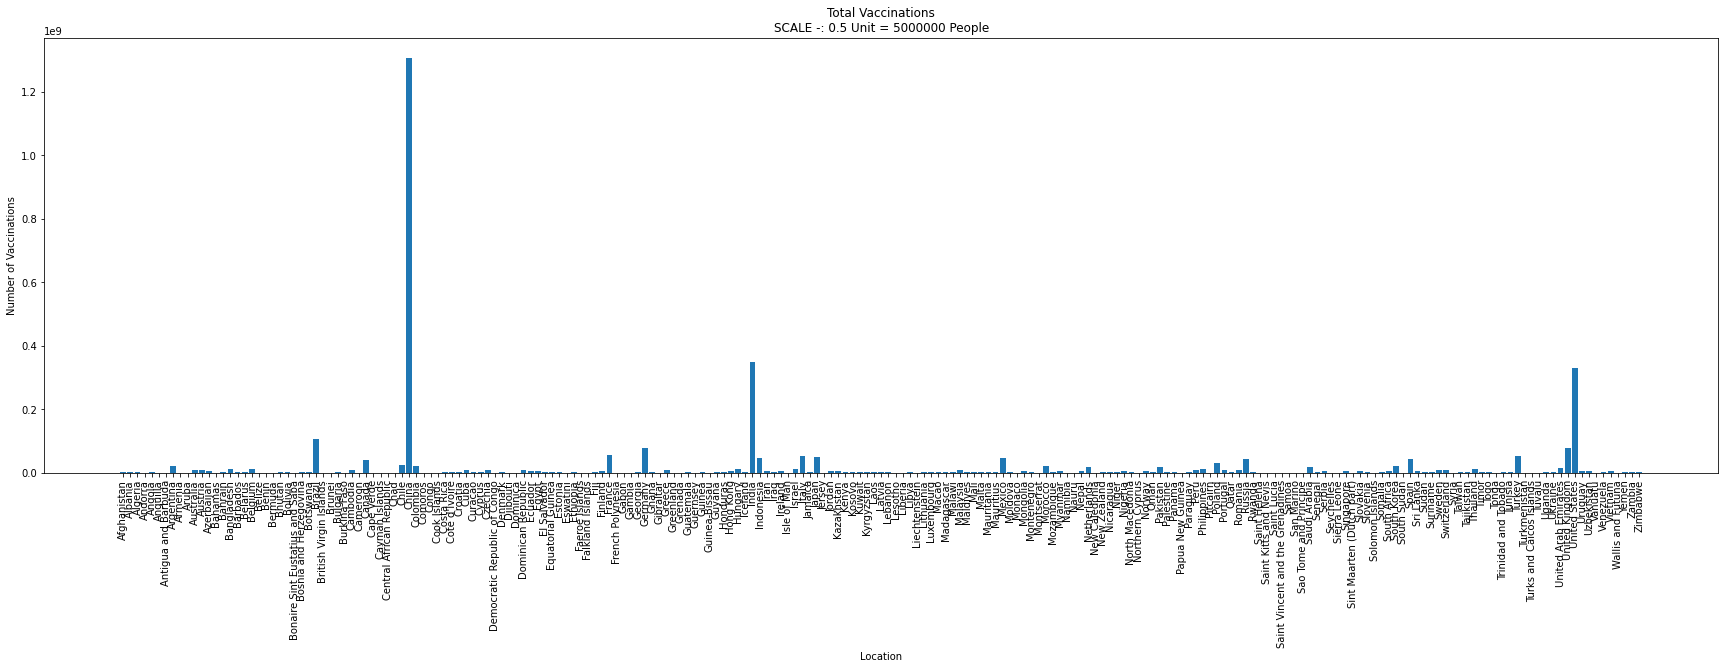

time: 40.4 s (started: 2021-07-13 18:05:33 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new5['Location'],df_new5['total_vaccinations'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Vaccinations\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Number of Vaccinations')
plt.xlabel('Location')
plt.show()

2. Covid-19 Vaccination data with respect to Time

In [ ]:
import pandas as pd
df6 = data.rename(columns={data.columns[3]:'Date',data.columns[34]:'total_vaccinations'})
df_new6 = df6[['Date','total_vaccinations']]
df_new6.dropna(subset = ["total_vaccinations"], inplace=True)
df_new6['Date'] = pd.to_datetime(df_new6['Date'])
df_new6['total_vaccinations'] = df_new6['total_vaccinations'].astype(int)
df_new6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15342 entries, 364 to 95493
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                15342 non-null  datetime64[ns]
 1   total_vaccinations  15342 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 359.6 KB
time: 103 ms (started: 2021-07-13 18:06:13 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

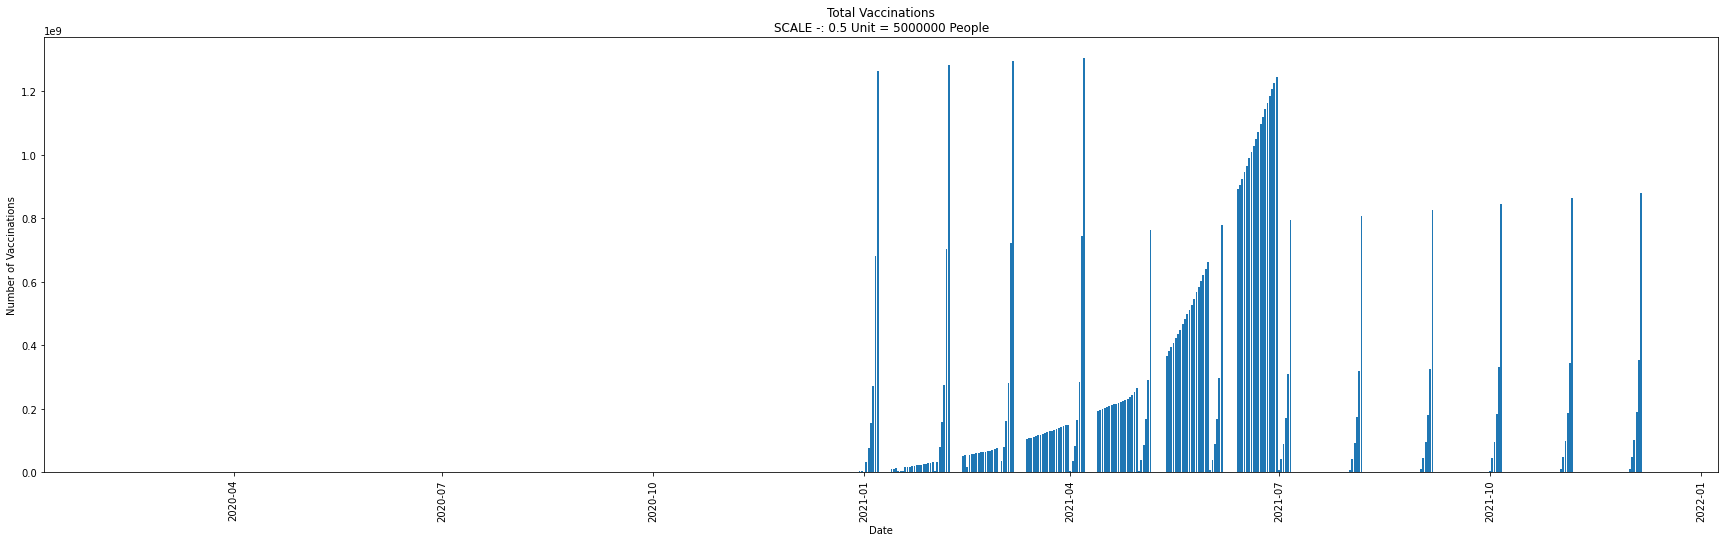

time: 30.6 s (started: 2021-07-13 18:06:13 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new6['Date'],df_new6['total_vaccinations'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Total Vaccinations\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Number of Vaccinations')
plt.xlabel('Date')
plt.show()

# 3. Model Fitting and Obtaining The Forecasts

**A. Total Cases of Covid-19**


---



In [ ]:
import pandas as pd
df7 = data.rename(columns={data.columns[3]:'ds',data.columns[4]:'y'})
df_new7 = df7[['ds','y']]
df_new7.dropna(subset = ["y"], inplace=True)
df_new7['ds'] = pd.to_datetime(df_new7['ds'])
df_new7['y'] = df_new7['y'].astype(int)
df_new7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

ds      y
0     2020-02-24      1
1     2020-02-25      1
2     2020-02-26      1
3     2020-02-27      1
4     2020-02-28      1
...          ...    ...
95489 2021-06-30  49864
95490 2021-01-07  51221
95491 2021-02-07  52663
95492 2021-03-07  53665
95493 2021-04-07  54474

[91893 rows x 2 columns]

time: 132 ms (started: 2021-07-13 18:06:44 +00:00)


In [ ]:
from fbprophet import Prophet
model1 = Prophet()
model1.fit(df_new7)
x1 = model1.make_future_dataframe(periods=30,freq='D')
forecast1 = model1.predict(x1)
forecast1[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat    yhat_lower    yhat_upper
0   2020-01-02  106902.861874 -2.331426e+06  2.424960e+06
1   2020-01-03  104873.089934 -2.351891e+06  2.367595e+06
2   2020-01-04  110793.673285 -2.286702e+06  2.470230e+06
3   2020-01-05  121109.239958 -2.216284e+06  2.299579e+06
4   2020-01-06  106107.727953 -2.246512e+06  2.298236e+06
..         ...            ...           ...           ...
555 2022-01-01  694129.144302 -1.718379e+06  3.064788e+06
556 2022-01-02  704757.027210 -1.651495e+06  2.914450e+06
557 2022-01-03  690067.831442 -1.563898e+06  3.067034e+06
558 2022-01-04  690922.845003 -1.627866e+06  2.992262e+06
559 2022-01-05  694155.116676 -1.496848e+06  3.068447e+06

[560 rows x 4 columns]

time: 25.3 s (started: 2021-07-13 18:06:44 +00:00)


**B. Total Deaths of Covid-19**


---



In [ ]:
#Forecasting For Death cases
import pandas as pd
df8 = data.rename(columns={data.columns[3]:'ds',data.columns[7]:'y'})
df_new8 = df8[['ds','y']]
df_new8.dropna(subset = ["y"], inplace=True)
df_new8['ds'] = pd.to_datetime(df_new8['ds'])
df_new8['y'] = df_new8['y'].astype(int)
df_new8

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds     y
27    2020-03-22     1
28    2020-03-23     1
29    2020-03-24     1
30    2020-03-25     2
31    2020-03-26     3
...          ...   ...
95489 2021-06-30  1789
95490 2021-01-07  1808
95491 2021-02-07  1841
95492 2021-03-07  1859
95493 2021-04-07  1878

[81905 rows x 2 columns]

time: 120 ms (started: 2021-07-13 18:07:09 +00:00)


In [ ]:
from fbprophet import Prophet
model2 = Prophet()
model2.fit(df_new8)
x2 = model2.make_future_dataframe(periods=30,freq='D')
forecast2 = model2.predict(x2)
forecast2[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-02   4451.750845 -45593.905186  52959.393434
1   2020-01-03   4364.931750 -47102.476278  53022.545294
2   2020-01-04   4467.824768 -49651.077202  58832.469644
3   2020-01-05   4676.795522 -46340.246635  51492.841216
4   2020-01-06   4364.307309 -46817.444349  54439.888808
..         ...           ...           ...           ...
555 2022-01-01  15801.185203 -36461.629193  67442.530011
556 2022-01-02  16022.298593 -34248.040865  66619.848238
557 2022-01-03  15721.953015 -32244.397083  66796.185513
558 2022-01-04  15745.745320 -33246.526013  67999.451363
559 2022-01-05  15815.140711 -32780.508376  61415.875907

[560 rows x 4 columns]

time: 27.6 s (started: 2021-07-13 18:07:10 +00:00)


**C. Total Vaccinations of Covid-19**


---



In [ ]:
#Forecasting For Covid cases
import pandas as pd
df9 = data.rename(columns={data.columns[3]:'ds',data.columns[34]:'y'})
df_new9 = df9[['ds','y']]
df_new9.dropna(subset = ["y"], inplace=True)
df_new9['ds'] = pd.to_datetime(df_new9['ds'])
df_new9['y'] = df_new9['y'].astype(int)
df_new9

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds        y
364   2021-02-22        0
370   2021-02-28     8200
386   2021-03-16    54000
408   2021-07-04   120000
423   2021-04-22   240000
...          ...      ...
95489 2021-06-30  1332438
95490 2021-01-07  1341960
95491 2021-02-07  1352718
95492 2021-03-07  1359587
95493 2021-04-07  1361210

[15342 rows x 2 columns]

time: 52.6 ms (started: 2021-07-13 18:07:37 +00:00)


In [ ]:
from fbprophet import Prophet
model3 = Prophet()
model3.fit(df_new9)
x3 = model3.make_future_dataframe(periods=30,freq='D')
forecast3 = model3.predict(x3)
forecast3[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-02-12  5.935132e+05 -7.188092e+07  7.514443e+07
1   2020-03-12  8.376590e+05 -7.498693e+07  7.288707e+07
2   2020-04-12  2.599697e+06 -7.616716e+07  7.715712e+07
3   2020-05-12  9.091174e+05 -7.072432e+07  7.634064e+07
4   2020-06-12  7.121358e+05 -7.709015e+07  7.544063e+07
..         ...           ...           ...           ...
240 2022-01-01  5.044243e+06 -7.132377e+07  8.504794e+07
241 2022-01-02  5.950181e+06 -6.445955e+07  8.011411e+07
242 2022-01-03  3.912881e+06 -7.374231e+07  8.202577e+07
243 2022-01-04  3.631287e+06 -6.762108e+07  8.414519e+07
244 2022-01-05  4.690837e+06 -6.840943e+07  8.435707e+07

[245 rows x 4 columns]

time: 5.02 s (started: 2021-07-13 18:07:37 +00:00)


# 4. Plotting The Forecasts

**A. Plotting the Forecasts for Total Cases of Covid-19**


---



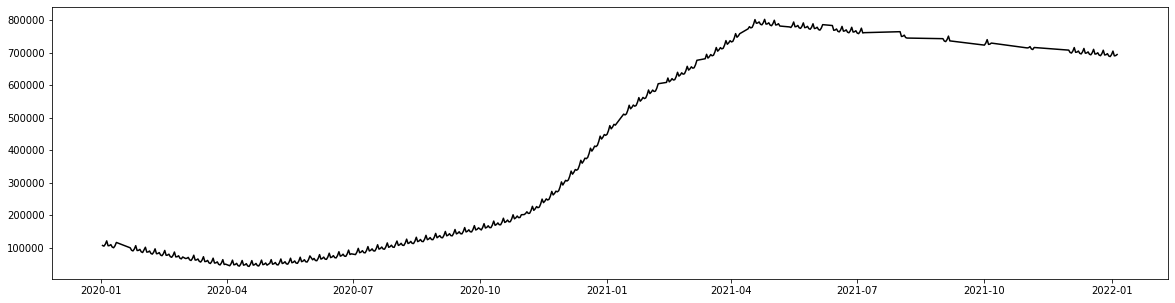

time: 257 ms (started: 2021-07-13 18:07:42 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast1['ds'],forecast1['yhat'],c='k')

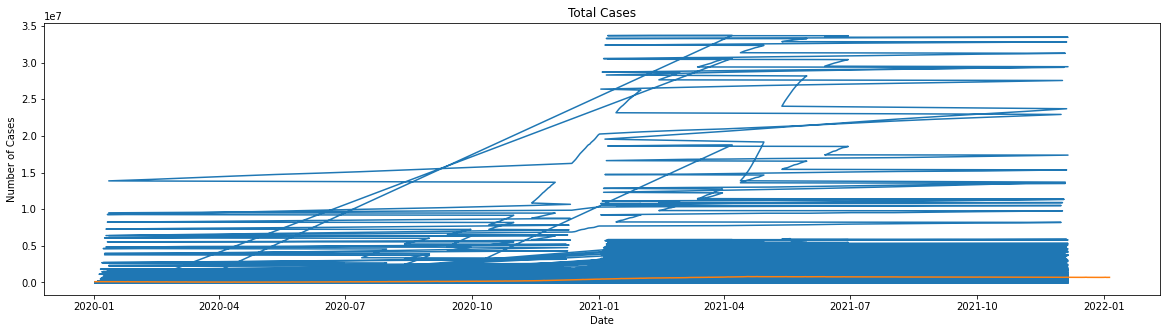

time: 327 ms (started: 2021-07-13 18:07:43 +00:00)


In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_new7['ds'],df_new7['y'])
plt.plot(forecast1['ds'],forecast1['yhat']) 
#Red Line is Forcasted Line of Cases
plt.title('Total Cases')
plt.ylabel('Number of Cases')
plt.xlabel('Date')
plt.show()

**B. Plotting the Forecasts for Total Deaths due to Covid-19**


---



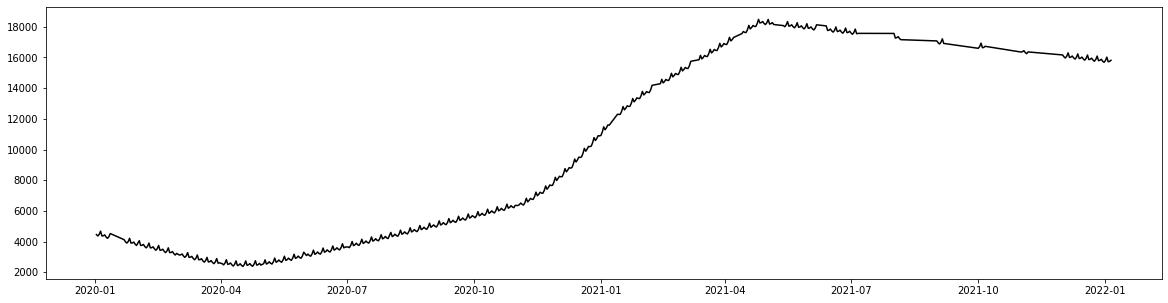

time: 309 ms (started: 2021-07-13 18:07:43 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast2['ds'],forecast2['yhat'],c='k')

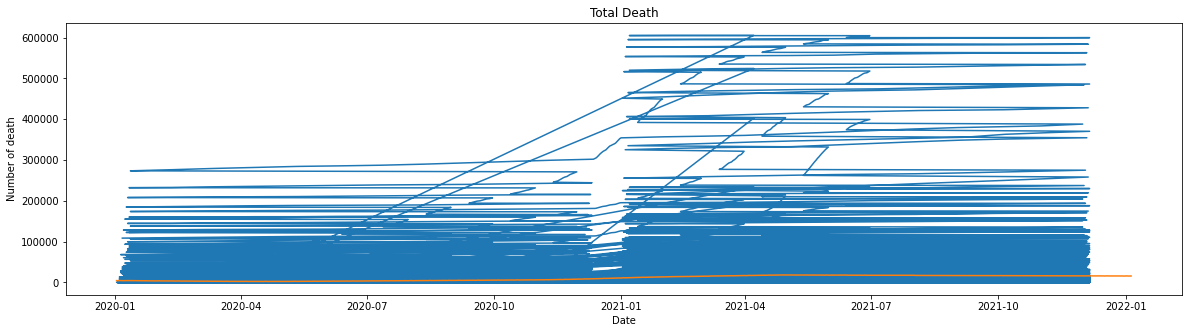

time: 319 ms (started: 2021-07-13 18:07:43 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new8['ds'],df_new8['y'])
plt.plot(forecast2['ds'],forecast2['yhat']) 
#Red Line is Forcasted Line of deaths
plt.title('Total Death')
plt.ylabel('Number of death')
plt.xlabel('Date')
plt.show()

**C. Plotting the Forecasts for Total Vaccination of Covid-19**


---



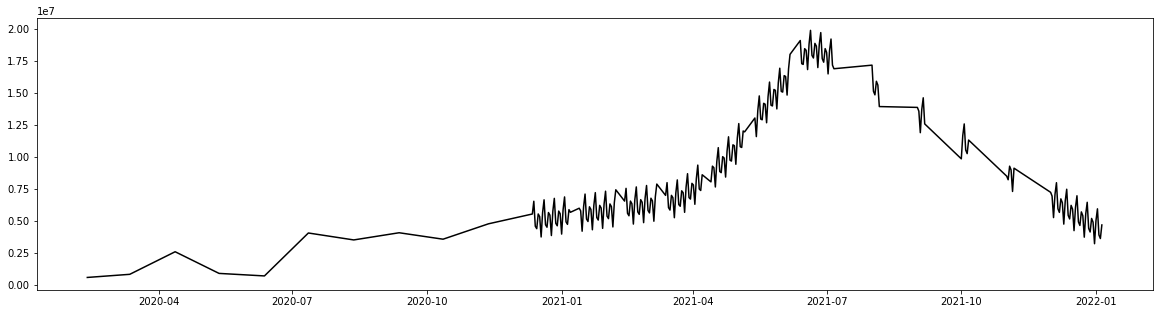

time: 318 ms (started: 2021-07-13 18:07:44 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast3['ds'],forecast3['yhat'],c='k')

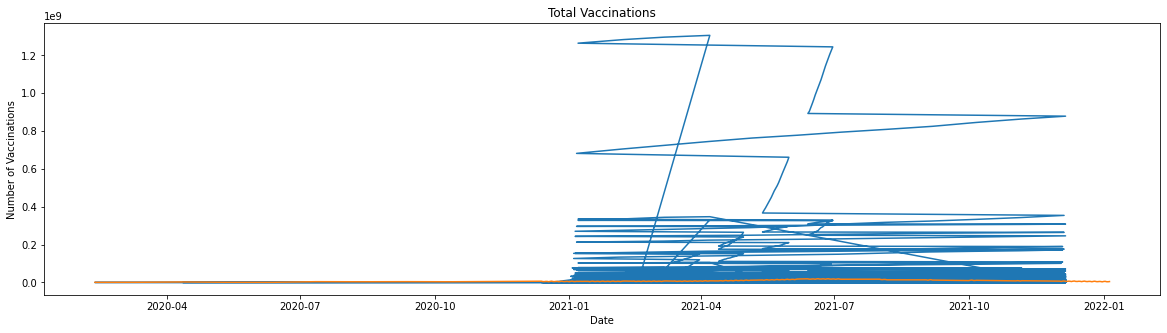

time: 296 ms (started: 2021-07-13 18:07:44 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new9['ds'],df_new9['y'])
plt.plot(forecast3['ds'],forecast3['yhat']) 
plt.title('Total Vaccinations')
plt.ylabel('Number of Vaccinations')
plt.xlabel('Date')
plt.show()

# 5. Cross Validation

**I. Cross Validation for Total cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv1 = cross_validation(model1,horizon="30 days",period='15 days')

INFO:fbprophet:Making 39 forecasts with cutoffs between 2020-04-15 00:00:00 and 2021-11-06 00:00:00



time: 14min 40s (started: 2021-07-13 18:07:44 +00:00)


**II. Cross Validation for Total Death cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv2 = cross_validation(model2,horizon="30 days",period='15 days')

INFO:fbprophet:Making 39 forecasts with cutoffs between 2020-04-15 00:00:00 and 2021-11-06 00:00:00



time: 14min 5s (started: 2021-07-13 18:22:25 +00:00)


**III. Cross Validation for Total Vaccination of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv3 = cross_validation(model3,horizon="30 days",period='15 days')

INFO:fbprophet:Making 35 forecasts with cutoffs between 2020-05-15 00:00:00 and 2021-11-06 00:00:00


INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 3.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 5.
INFO:fbprophet:n_changepoints greater than number of observations. Using 6.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.
INFO:fbprophet:n_changepoints greater than number of observations. Using 7.



time: 1min 59s (started: 2021-07-13 18:36:30 +00:00)


#   6. Computing Performance Matrics

**I. Performance Matrics for Total cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance1 = performance_metrics(df_cv1)
df_performance1.head()

horizon           mse          rmse  ...         mape      mdape  coverage
0  4 days  3.598175e+12  1.896886e+06  ...  4813.827162  16.795420  0.954699
1  5 days  3.937403e+12  1.984289e+06  ...  5538.980783  17.678532  0.954248
2  6 days  3.947467e+12  1.986823e+06  ...  6463.055874  19.449689  0.956105
3  7 days  3.533114e+12  1.879658e+06  ...  6961.803822  22.127022  0.960097
4  8 days  3.229822e+12  1.797171e+06  ...  6723.168169  21.953970  0.961955

[5 rows x 7 columns]

time: 540 ms (started: 2021-07-13 18:38:30 +00:00)


**II. Performance Matrics for Total Death cases of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance2 = performance_metrics(df_cv2)
df_performance2.head()

horizon           mse          rmse  ...        mape      mdape  coverage
0  4 days  1.590413e+09  39879.986953  ...  380.685001  20.892661  0.935174
1  5 days  1.723444e+09  41514.388376  ...  403.806733  19.941468  0.935336
2  6 days  1.725729e+09  41541.895904  ...  431.988862  20.693950  0.936866
3  7 days  1.558059e+09  39472.256557  ...  475.602062  22.892654  0.940066
4  8 days  1.422956e+09  37722.094415  ...  501.035021  23.632522  0.941909

[5 rows x 7 columns]

time: 518 ms (started: 2021-07-13 18:38:31 +00:00)


**III. Performance Matrics for Total Vaccination of Covid-19**


---



In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance3 = performance_metrics(df_cv3)
df_performance3.head()

INFO:fbprophet:Skipping MAPE because y close to 0


horizon           mse          rmse           mae      mdape  coverage
0  4 days  3.422282e+15  5.850028e+07  1.671423e+07  12.525002  0.972535
1  5 days  3.453163e+15  5.876362e+07  1.703270e+07  11.442153  0.971770
2  6 days  3.704888e+15  6.086779e+07  1.715650e+07  11.577543  0.973647
3  7 days  3.294040e+15  5.739373e+07  1.627457e+07  13.389515  0.971232
4  8 days  2.584707e+15  5.084001e+07  1.518225e+07  16.402012  0.965259

time: 205 ms (started: 2021-07-13 18:38:31 +00:00)


# 7. Visualize the Performance Metrics

**I. Performance Matrics of Total cases of Covid-19**


---



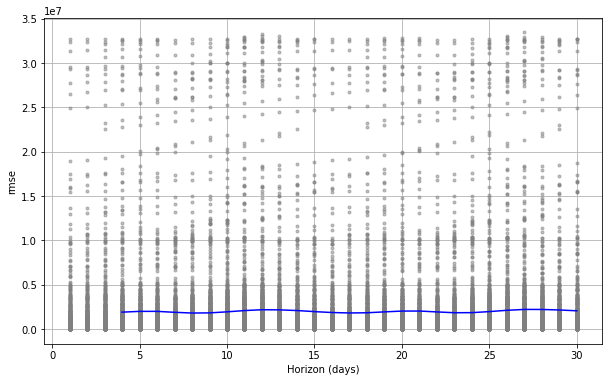

time: 1.73 s (started: 2021-07-13 18:38:32 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig1 = plot_cross_validation_metric(df_cv1,metric='rmse')

**II. Performance Matrics for Total Death cases of Covid-19**


---



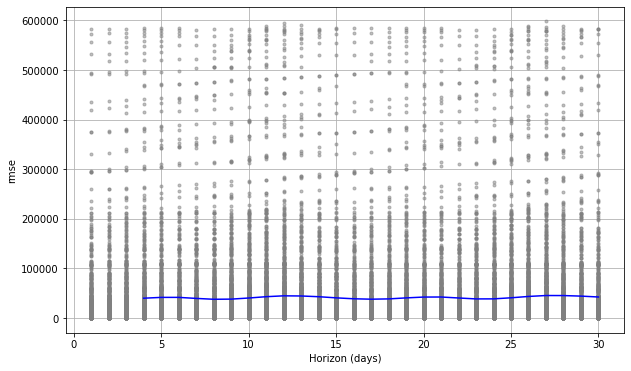

time: 1.63 s (started: 2021-07-13 18:38:33 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig2 = plot_cross_validation_metric(df_cv2,metric='rmse')

**III. Performance Matrics for Total Vaccination of Covid-19**

---



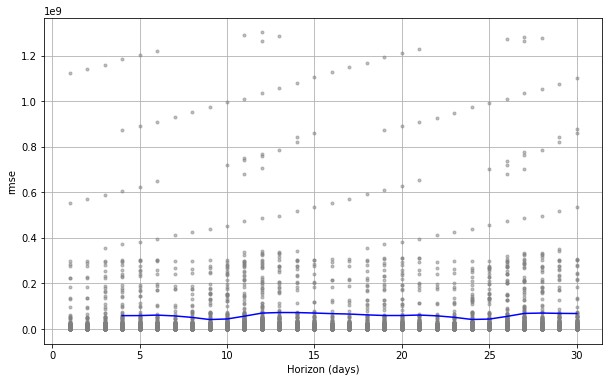

time: 557 ms (started: 2021-07-13 18:38:35 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(df_cv3,metric='rmse')

# 8.Case Study Part I

# BASES ON AGE GROUP

## Medium Aged

**CREATING DATASET OF LOCATION AND MEDIAN AGE**

In [ ]:
import pandas as pd
df_ma1 = data.rename(columns={data.columns[2]:'Location',data.columns[46]:'median_age'})
df_new_ma1 = df_ma1[['Location','median_age']]
df_new_ma1.dropna(subset = ["median_age"], inplace=True)
df_new_ma1['median_age'] = df_new_ma1['median_age'].astype(int)

time: 41.3 ms (started: 2021-07-13 18:38:36 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
#CREATING DATASET OF DATES AND MEDIAN AGE
df_ma2 = data.rename(columns={data.columns[3]:'Date',data.columns[46]:'median_age'})
df_new_ma2 = df_ma2[['Date','median_age']]
df_new_ma2.dropna(subset = ["median_age"], inplace=True)
df_new_ma2['Date'] = pd.to_datetime(df_new_ma2['Date'])
df_new_ma2['median_age'] = df_new_ma2['median_age'].astype(int)

time: 106 ms (started: 2021-07-13 18:38:36 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

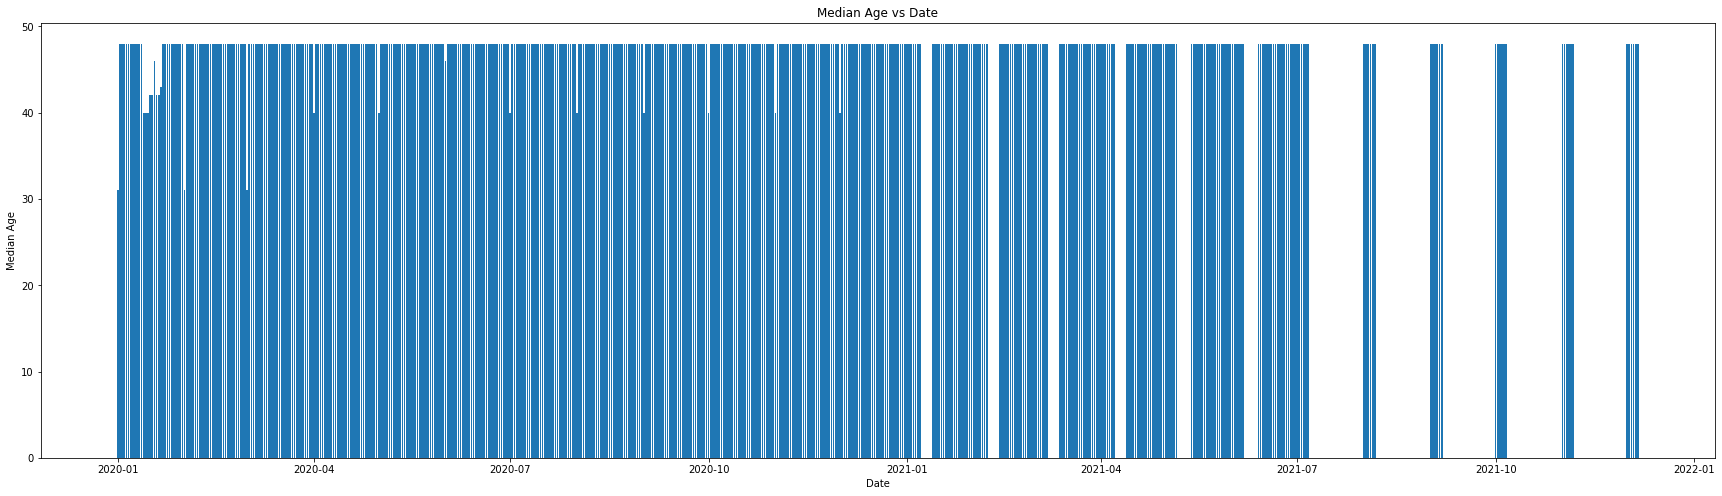

time: 2min 42s (started: 2021-07-13 18:38:36 +00:00)


In [ ]:
#PLOTTING MEDIAN AGE VS DATES
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new_ma2['Date'],df_new_ma2['median_age'])
plt.autoscale()
plt.title('Median Age vs Date')
plt.ylabel('Median Age')
plt.xlabel('Date')
plt.show()

In [ ]:
#CREATING DATASET FOR FORECATING FOR MEDIAN AGE
import pandas as pd
df_ma3 = data.rename(columns={data.columns[3]:'ds',data.columns[46]:'y'})
df_new_ma3 = df_ma3[['ds','y']]
df_new_ma3.dropna(subset = ["y"], inplace=True)
df_new_ma3['ds'] = pd.to_datetime(df_new_ma3['ds'])
df_new_ma3['y'] = df_new_ma3['y'].astype(int)
df_new_ma3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds   y
0     2020-02-24  18
1     2020-02-25  18
2     2020-02-26  18
3     2020-02-27  18
4     2020-02-28  18
...          ...  ..
95489 2021-06-30  19
95490 2021-01-07  19
95491 2021-02-07  19
95492 2021-03-07  19
95493 2021-04-07  19

[89005 rows x 2 columns]

time: 124 ms (started: 2021-07-13 18:41:19 +00:00)


In [ ]:
#FORECATING FOR MEDIAN AGE
from fbprophet import Prophet
model_ma = Prophet()
model_ma.fit(df_new_ma3)
x_ma = model_ma.make_future_dataframe(periods=30,freq='D')
forecast_ma = model_ma.predict(x_ma)
forecast_ma[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds       yhat  yhat_lower  yhat_upper
0   2020-01-01  31.135429   18.641616   41.942027
1   2020-01-02  31.220809   20.090450   42.672791
2   2020-01-03  31.261910   19.755594   42.890340
3   2020-01-04  31.180281   18.659334   43.276829
4   2020-01-05  31.159791   19.326671   43.579555
..         ...        ...         ...         ...
576 2022-01-01  29.885089   19.437068   41.390901
577 2022-01-02  29.857763   18.022832   42.054512
578 2022-01-03  29.907759   17.150185   42.091246
579 2022-01-04  29.873377   18.419417   41.759461
580 2022-01-05  29.860937   18.924102   41.683778

[581 rows x 4 columns]

time: 37.7 s (started: 2021-07-13 18:41:19 +00:00)


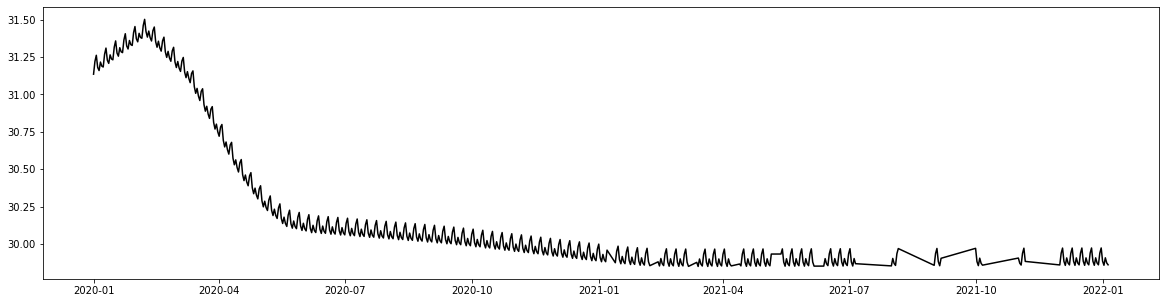

time: 249 ms (started: 2021-07-13 18:41:56 +00:00)


In [ ]:
#PLOT FOR FORECASTING FOR TOTAL MEDIAN AGE 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast_ma['ds'],forecast_ma['yhat'],c='k')

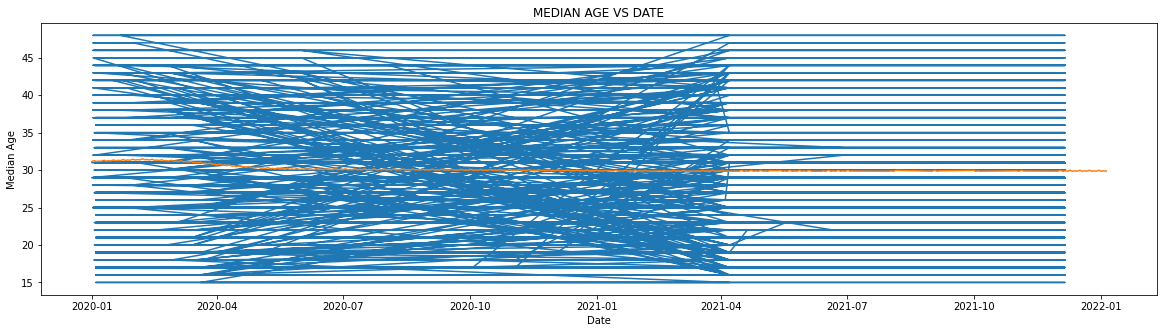

time: 277 ms (started: 2021-07-13 18:41:57 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new_ma3['ds'],df_new_ma3['y'])
plt.plot(forecast_ma['ds'],forecast_ma['yhat']) 
plt.title('MEDIAN AGE VS DATE')
plt.ylabel('Median Age')
plt.xlabel('Date')
plt.show()

In [ ]:
#CROSS VALIDATIONS
from fbprophet.diagnostics import cross_validation
df_cv_ma=cross_validation(model_ma,horizon="30 days",period='15 days')

INFO:fbprophet:Making 40 forecasts with cutoffs between 2020-03-31 00:00:00 and 2021-11-06 00:00:00



time: 14min 47s (started: 2021-07-13 18:41:57 +00:00)


In [ ]:
#PERFORMANCE MATRIX
from fbprophet.diagnostics import performance_metrics
df_performance_ma=performance_metrics(df_cv_ma)
df_performance_ma.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  83.826813  9.155698  7.889183  0.298163  0.261147  0.737018
1  5 days  83.834354  9.156110  7.887329  0.297135  0.261147  0.737534
2  6 days  83.826012  9.155655  7.884651  0.296833  0.260874  0.736643
3  7 days  83.798209  9.154136  7.881812  0.297261  0.260986  0.733889
4  8 days  83.686310  9.148022  7.878028  0.298508  0.262417  0.734361

time: 526 ms (started: 2021-07-13 18:56:44 +00:00)


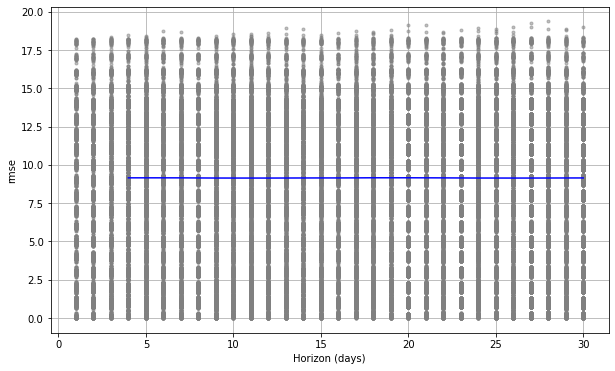

time: 1.71 s (started: 2021-07-13 18:56:45 +00:00)


In [ ]:
#CROSS VALIDATION MATRIX
from fbprophet.plot import plot_cross_validation_metric
fig_ma = plot_cross_validation_metric(df_cv_ma,metric='rmse')

## Age 65 Older

**CREATING DATASET OF LOCATION AND AGED 65 OLDER**

In [ ]:
import pandas as pd
df_a65_1 = data.rename(columns={data.columns[2]:'Location',data.columns[47]:'aged_65_older'})
df_new_a65_1 = df_a65_1[['Location','aged_65_older']]
df_new_a65_1.dropna(subset = ["aged_65_older"], inplace=True)
df_new_a65_1['aged_65_older'] = df_new_a65_1['aged_65_older'].astype(int)
df_new_a65_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Location  aged_65_older
0      Afghanistan              2
1      Afghanistan              2
2      Afghanistan              2
3      Afghanistan              2
4      Afghanistan              2
...            ...            ...
95489     Zimbabwe              2
95490     Zimbabwe              2
95491     Zimbabwe              2
95492     Zimbabwe              2
95493     Zimbabwe              2

[87999 rows x 2 columns]

time: 73 ms (started: 2021-07-13 18:56:47 +00:00)


**CREATING DATASET OF DATES AND AGED 65 OLDER**

In [ ]:
df_a65_2 = data.rename(columns={data.columns[3]:'Date',data.columns[47]:'aged_65_older'})
df_new_a65_2 = df_a65_2[['Date','aged_65_older']]
df_new_a65_2.dropna(subset = ["aged_65_older"], inplace=True)
df_new_a65_2['Date'] = pd.to_datetime(df_new_a65_2['Date'])
df_new_a65_2['aged_65_older'] = df_new_a65_2['aged_65_older'].astype(int)
df_new_a65_2['aged_65_older']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

0        2
1        2
2        2
3        2
4        2
        ..
95489    2
95490    2
95491    2
95492    2
95493    2
Name: aged_65_older, Length: 87999, dtype: int64

time: 122 ms (started: 2021-07-13 18:56:47 +00:00)


**PLOTTING AGED 65 OLDER VS LOCATIONS**

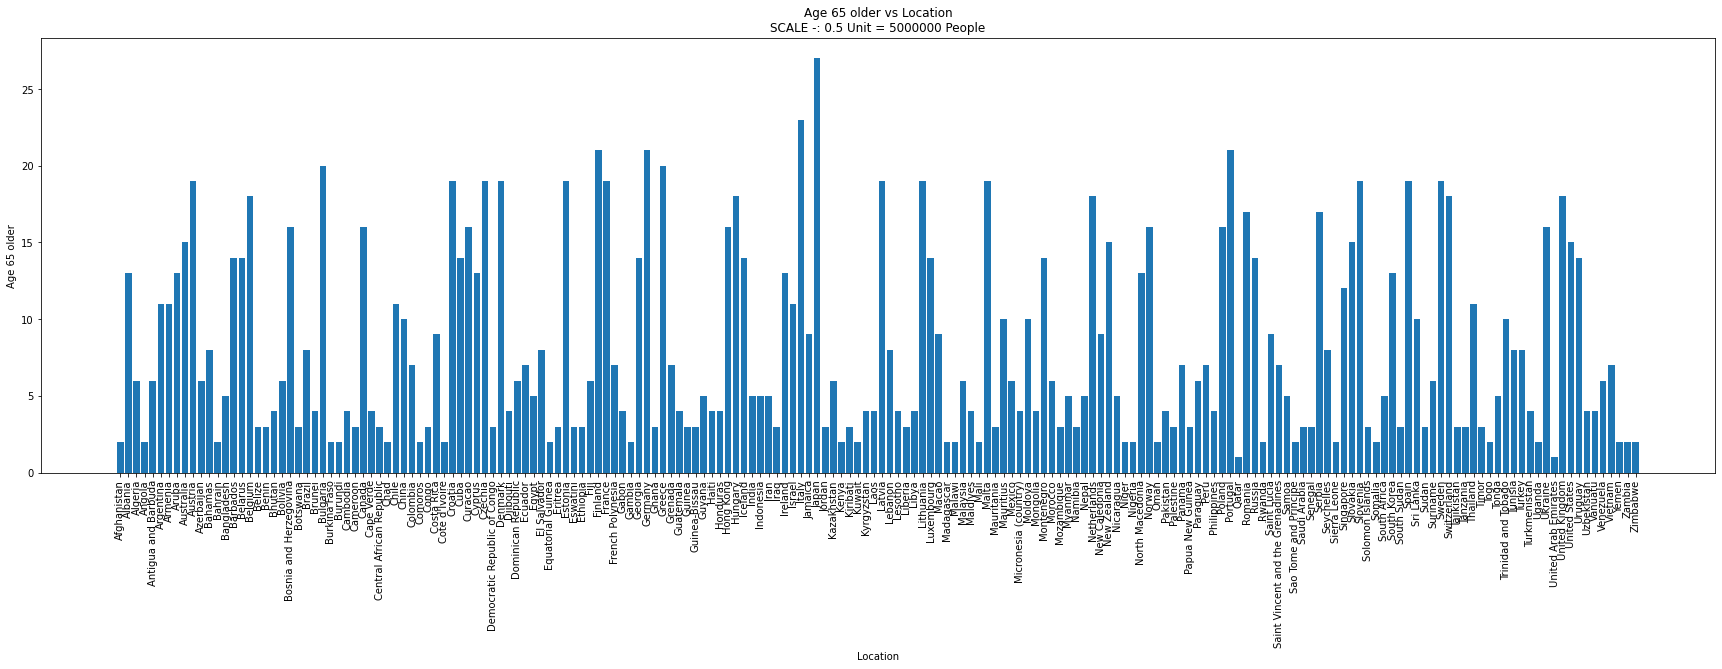

time: 2min 44s (started: 2021-07-13 18:56:47 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new_a65_1['Location'],df_new_a65_1['aged_65_older'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Age 65 older vs Location\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Age 65 older')
plt.xlabel('Location')
plt.show()

**CREATING DATASET FOR FORECATING  AGED 65 OLDER**

In [ ]:
import pandas as pd
df_a65_3 = data.rename(columns={data.columns[3]:'ds',data.columns[47]:'y'})
df_new_a65_3 = df_a65_3[['ds','y']]
df_new_a65_3.dropna(subset = ["y"], inplace=True)
df_new_a65_3['ds'] = pd.to_datetime(df_new_a65_3['ds'])
df_new_a65_3['y'] = df_new_a65_3['y'].astype(int)
df_new_a65_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds  y
0     2020-02-24  2
1     2020-02-25  2
2     2020-02-26  2
3     2020-02-27  2
4     2020-02-28  2
...          ... ..
95489 2021-06-30  2
95490 2021-01-07  2
95491 2021-02-07  2
95492 2021-03-07  2
95493 2021-04-07  2

[87999 rows x 2 columns]

time: 166 ms (started: 2021-07-13 18:59:32 +00:00)


**FORECATING FOR AGED 65 OLDER**

In [ ]:
from fbprophet import Prophet
model_65 = Prophet()
model_65.fit(df_new_a65_3)
x_65 = model_65.make_future_dataframe(periods=30,freq='D')
forecast_65 = model_65.predict(x_65)
forecast_65[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
0   2020-01-01  9.106252    1.041748   17.171372
1   2020-01-02  9.145770    0.592988   17.032831
2   2020-01-03  9.166812    1.428889   16.986422
3   2020-01-04  9.104603    1.108449   16.525179
4   2020-01-05  9.085340    1.870471   17.261804
..         ...       ...         ...         ...
576 2022-01-01  8.091289   -0.113176   16.526462
577 2022-01-02  8.075868    0.348048   16.800012
578 2022-01-03  8.106598    0.183341   17.024230
579 2022-01-04  8.083703    0.414195   15.570712
580 2022-01-05  8.080555    0.847116   16.610178

[581 rows x 4 columns]

time: 34.7 s (started: 2021-07-13 18:59:32 +00:00)


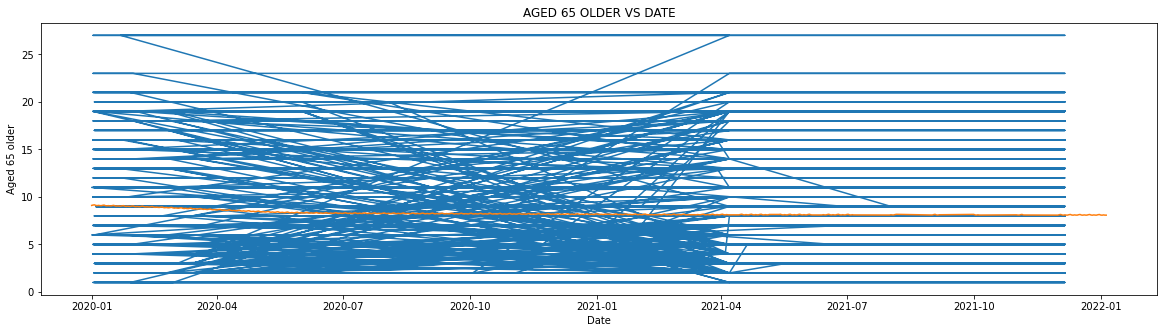

time: 263 ms (started: 2021-07-13 19:00:07 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new_a65_3['ds'],df_new_a65_3['y'])
plt.plot(forecast_65['ds'],forecast_65['yhat']) 
plt.title('AGED 65 OLDER VS DATE')
plt.ylabel('Aged 65 older')
plt.xlabel('Date')
plt.show()

**CROSS VALIDATIONS**

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv_65=cross_validation(model_65,horizon="30 days",period='15 days')

INFO:fbprophet:Making 40 forecasts with cutoffs between 2020-03-31 00:00:00 and 2021-11-06 00:00:00



time: 11min 58s (started: 2021-07-13 19:00:07 +00:00)


**PERFORMANCE MATRIX**

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_performance_65=performance_metrics(df_cv_65)
df_performance_65.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  38.889907  6.236177  5.363190  1.146937  0.606179  0.839705
1  5 days  38.983731  6.243695  5.362801  1.139843  0.602411  0.838330
2  6 days  38.989822  6.244183  5.360289  1.137512  0.596794  0.838475
3  7 days  38.921845  6.238737  5.356358  1.139989  0.604022  0.838863
4  8 days  38.673390  6.218793  5.342999  1.146462  0.608548  0.841264

time: 515 ms (started: 2021-07-13 19:12:05 +00:00)


**CROSS VALIDATION MATRIX**

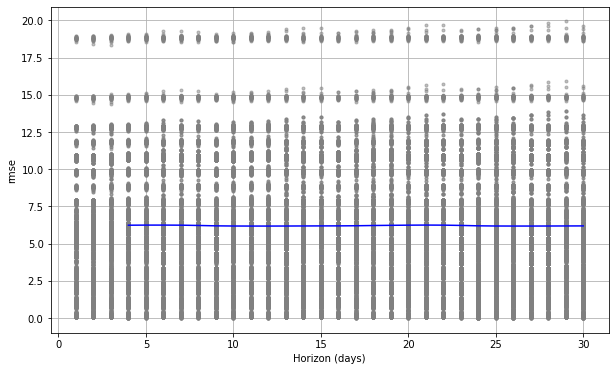

time: 1.7 s (started: 2021-07-13 19:12:05 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig_65 = plot_cross_validation_metric(df_cv_65,metric='rmse')

## Age 70 Older

**CREATING DATASET OF LOCATION AND AGED 70 OLDER**

In [ ]:
#CREATING DATASET OF LOCATION AND AGED 65 OLDER
df_a70_1 = data.rename(columns={data.columns[2]:'Location',data.columns[48]:'aged_70_older'})
df_new_a70_1 = df_a65_1[['Location','aged_70_older']]
df_new_a70_1.dropna(subset = ["aged_70_older"], inplace=True)
df_new_a70_1['aged_70_older'] = df_new_a70_1['aged_70_older'].astype(int)
df_new_a70_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Location  aged_70_older
0      Afghanistan              1
1      Afghanistan              1
2      Afghanistan              1
3      Afghanistan              1
4      Afghanistan              1
...            ...            ...
95489     Zimbabwe              1
95490     Zimbabwe              1
95491     Zimbabwe              1
95492     Zimbabwe              1
95493     Zimbabwe              1

[88510 rows x 2 columns]

time: 67.3 ms (started: 2021-07-13 19:12:07 +00:00)


**CREATING DATASET OF DATES AND AGED 70 OLDER**

In [ ]:
df_a70_2 = data.rename(columns={data.columns[3]:'Date',data.columns[48]:'aged_70_older'})
df_new_a70_2 = df_a70_2[['Date','aged_70_older']]
df_new_a70_2.dropna(subset = ["aged_70_older"], inplace=True)
df_new_a70_2['Date'] = pd.to_datetime(df_new_a70_2['Date'])
df_new_a70_2['aged_70_older'] = df_new_a70_2['aged_70_older'].astype(int)
df_new_a70_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

Date  aged_70_older
0     2020-02-24              1
1     2020-02-25              1
2     2020-02-26              1
3     2020-02-27              1
4     2020-02-28              1
...          ...            ...
95489 2021-06-30              1
95490 2021-01-07              1
95491 2021-02-07              1
95492 2021-03-07              1
95493 2021-04-07              1

[88510 rows x 2 columns]

time: 119 ms (started: 2021-07-13 19:12:07 +00:00)


**PLOTTING AGED 70 OLDER VS LOCATIONS**

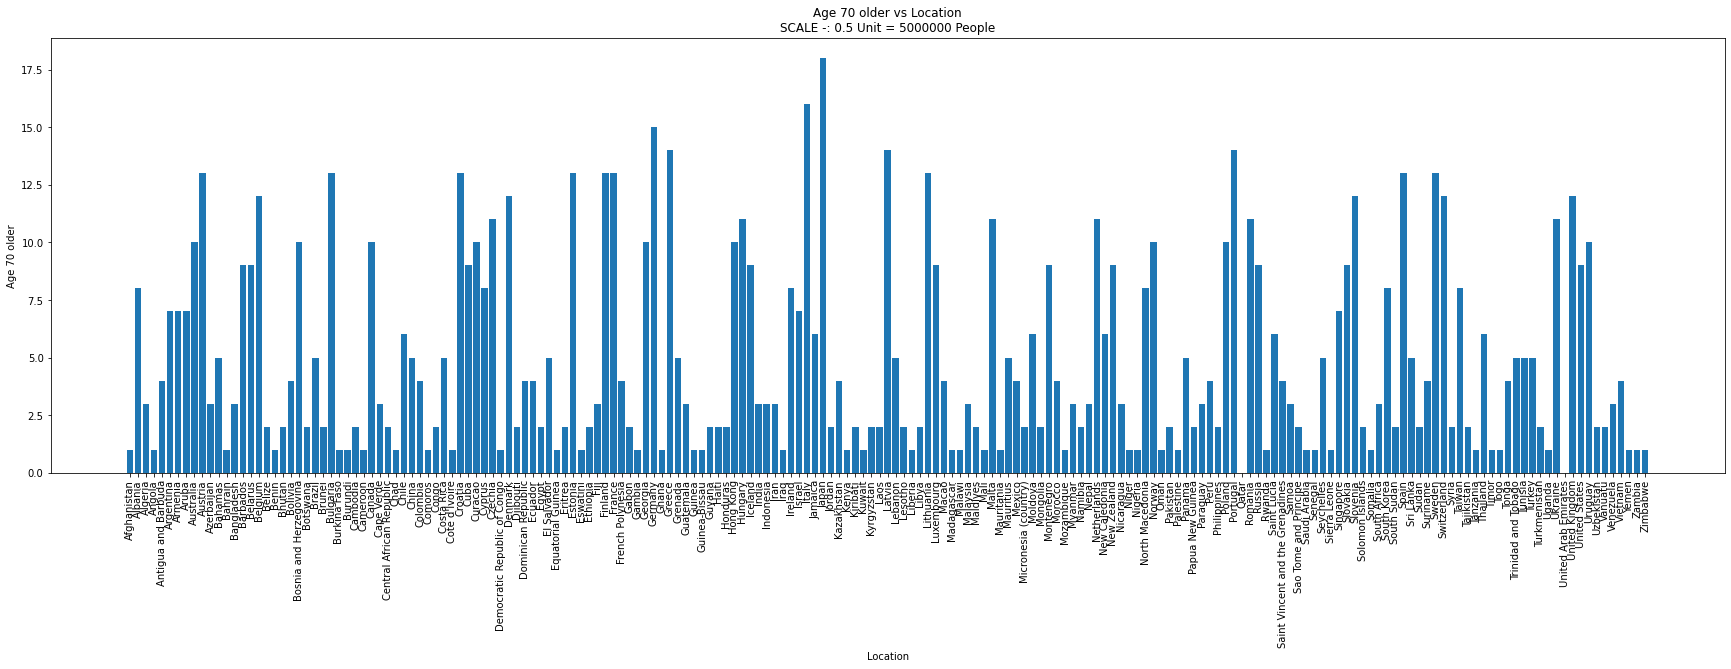

time: 2min 50s (started: 2021-07-13 19:12:07 +00:00)


In [ ]:
#PLOTTING AGED 70 OLDER VS LOCATIONS
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new_a70_1['Location'],df_new_a70_1['aged_70_older'])
plt.autoscale()
plt.xticks(rotation=90)
plt.title('Age 70 older vs Location\nSCALE -: 0.5 Unit = 5000000 People')
plt.ylabel('Age 70 older')
plt.xlabel('Location')
plt.show()

**PLOTTING AGED 70 OLDER VS DATES**

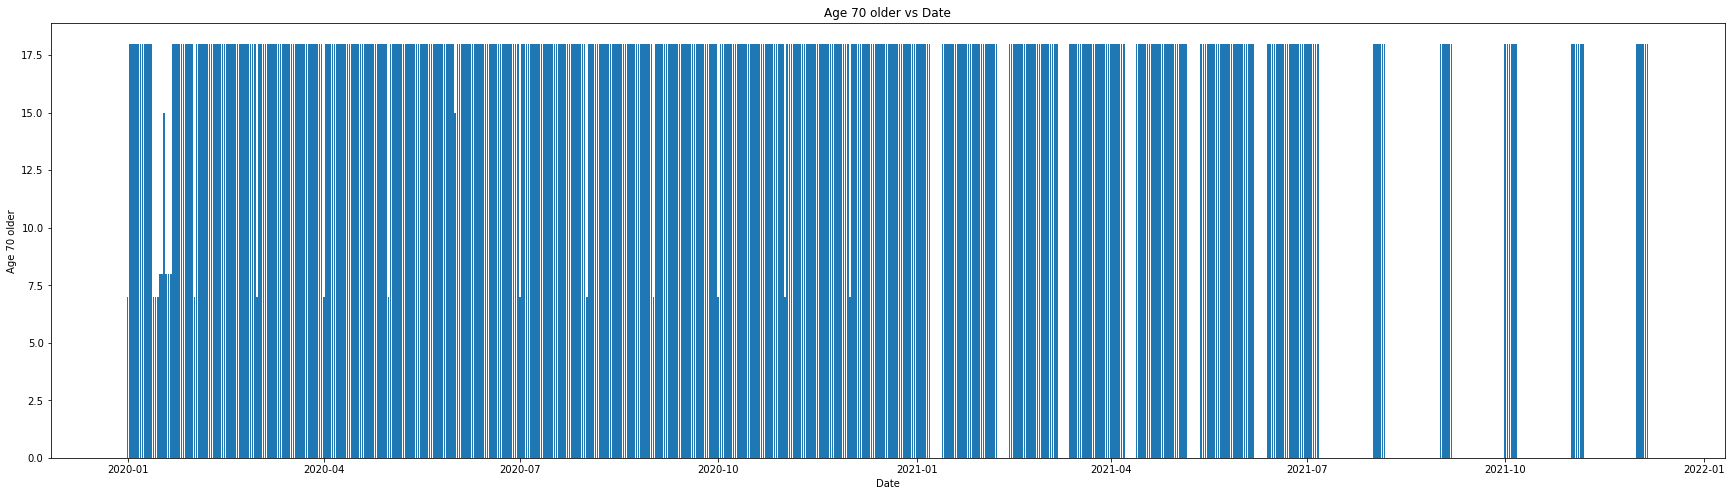

time: 2min 56s (started: 2021-07-13 19:14:58 +00:00)


In [ ]:
#PLOTTING AGED 70 OLDER VS DATES
import matplotlib.pyplot as plt
plt.figure(figsize=(30,8))
plt.bar(df_new_a70_2['Date'],df_new_a70_2['aged_70_older'])
plt.autoscale()
plt.title('Age 70 older vs Date')
plt.ylabel('Age 70 older')
plt.xlabel('Date')
plt.show()

**CREATING DATASET FOR FORECATING FOR AGED 70 OLDER**

In [ ]:
import pandas as pd
df_a70_3 = data.rename(columns={data.columns[3]:'ds',data.columns[47]:'y'})
df_new_a70_3 = df_a70_3[['ds','y']]
df_new_a70_3.dropna(subset = ["y"], inplace=True)
df_new_a70_3['ds'] = pd.to_datetime(df_new_a70_3['ds'])
df_new_a70_3['y'] = df_new_a70_3['y'].astype(int)
df_new_a70_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

ds  y
0     2020-02-24  2
1     2020-02-25  2
2     2020-02-26  2
3     2020-02-27  2
4     2020-02-28  2
...          ... ..
95489 2021-06-30  2
95490 2021-01-07  2
95491 2021-02-07  2
95492 2021-03-07  2
95493 2021-04-07  2

[87999 rows x 2 columns]

time: 117 ms (started: 2021-07-13 19:17:54 +00:00)


**FORECATING FOR AGED 70 OLDER**

In [ ]:
from fbprophet import Prophet
model_70 = Prophet()
model_70.fit(df_new_a70_3)
x_70 = model_70.make_future_dataframe(periods=30,freq='D')
forecast_70 = model_70.predict(x_70)
forecast_70[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds      yhat  yhat_lower  yhat_upper
0   2020-01-01  9.106252    0.625096   16.466940
1   2020-01-02  9.145770    1.054940   16.881152
2   2020-01-03  9.166812    0.785314   17.236079
3   2020-01-04  9.104603    1.768084   17.155513
4   2020-01-05  9.085340    1.337118   17.204854
..         ...       ...         ...         ...
576 2022-01-01  8.091289   -0.203404   16.026177
577 2022-01-02  8.075868   -0.353534   16.644734
578 2022-01-03  8.106598   -0.297996   16.135340
579 2022-01-04  8.083703   -0.093874   16.134502
580 2022-01-05  8.080555   -0.738395   15.942321

[581 rows x 4 columns]

time: 35 s (started: 2021-07-13 19:17:54 +00:00)


**PLOT FOR FORECASTING FOR TOTAL AGED 70 OLDER**

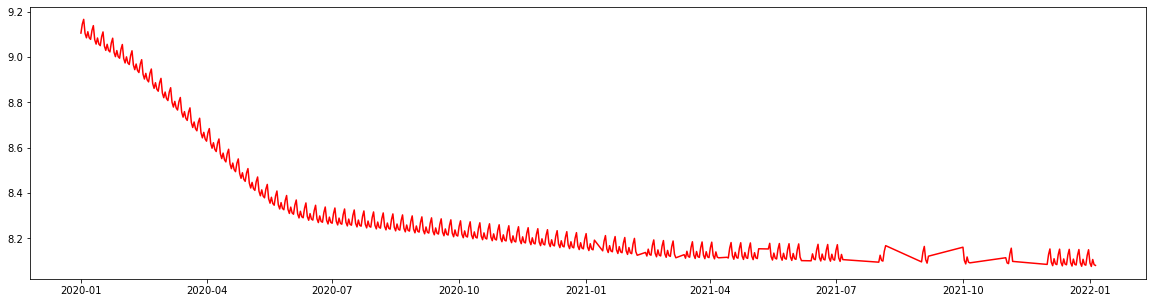

time: 247 ms (started: 2021-07-13 19:18:29 +00:00)


In [ ]:
#PLOT FOR FORECASTING FOR TOTAL AGED 70 OLDER 
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(forecast_70['ds'],forecast_70['yhat'],c='red')

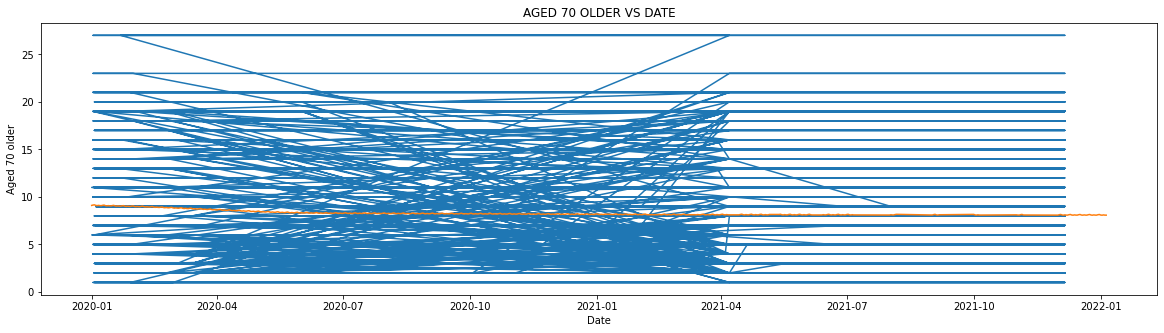

time: 277 ms (started: 2021-07-13 19:18:30 +00:00)


In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.plot(df_new_a70_3['ds'],df_new_a70_3['y'])
plt.plot(forecast_70['ds'],forecast_70['yhat']) 
plt.title('AGED 70 OLDER VS DATE')
plt.ylabel('Aged 70 older')
plt.xlabel('Date')
plt.show()

**CROSS VALIDATIONS**

In [ ]:
#CROSS VALIDATIONS
from fbprophet.diagnostics import cross_validation
df_cv_70=cross_validation(model_70,horizon="30 days",period='15 days')

INFO:fbprophet:Making 40 forecasts with cutoffs between 2020-03-31 00:00:00 and 2021-11-06 00:00:00



time: 12min 5s (started: 2021-07-13 19:18:30 +00:00)


**PERFORMANCE MATRIX**

In [ ]:
#PERFORMANCE MATRIX
from fbprophet.diagnostics import performance_metrics
df_performance_70=performance_metrics(df_cv_70)
df_performance_70.head()

horizon        mse      rmse       mae      mape     mdape  coverage
0  4 days  38.889907  6.236177  5.363190  1.146937  0.606179  0.839847
1  5 days  38.983731  6.243695  5.362801  1.139843  0.602411  0.838182
2  6 days  38.989822  6.244183  5.360289  1.137512  0.596794  0.838095
3  7 days  38.921845  6.238737  5.356358  1.139989  0.604022  0.838152
4  8 days  38.673390  6.218793  5.342999  1.146462  0.608548  0.840304

time: 526 ms (started: 2021-07-13 19:30:36 +00:00)


**CROSS VALIDATION MATRIX**

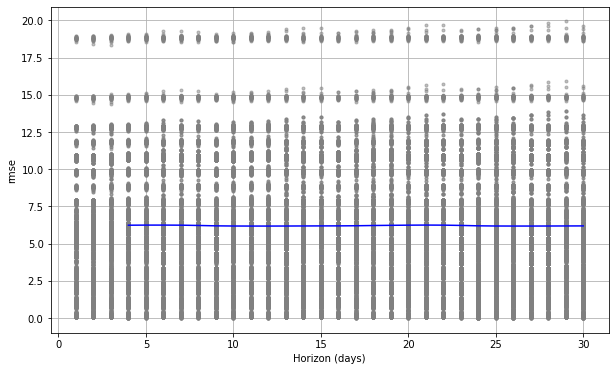

time: 1.73 s (started: 2021-07-13 19:30:36 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig_70 = plot_cross_validation_metric(df_cv_70,metric='rmse')

# 9. Case study Part II

#   BASED ON COUNTRY

## A. India

**Total Covid 19 Cases in India**


---



I. Data Preproccessing With Time series

In [ ]:
df_cases = data.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
39351  30-01-2020  1.0
39352  31-01-2020  1.0
39353  01-02-2020  1.0
39354  02-02-2020  2.0
39355  03-02-2020  3.0

time: 39.3 ms (started: 2021-07-13 19:30:38 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model4 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model4.fit(df_cases)
future = model4.make_future_dataframe(periods=30)
future
forecast4 = model4.predict(future)
forecast4[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-02  1.276170e+06 -6.817792e+06  9.099943e+06
1   2020-01-03  1.298387e+06 -7.045792e+06  9.728132e+06
2   2020-01-04  1.617970e+06 -6.554538e+06  9.575156e+06
3   2020-01-05  1.915557e+06 -6.462402e+06  9.701328e+06
4   2020-01-06  1.488883e+06 -6.618340e+06  1.020858e+07
..         ...           ...           ...           ...
547 2022-01-01  1.282222e+07  4.267535e+06  2.167222e+07
548 2022-01-02  1.306581e+07  4.507901e+06  2.142658e+07
549 2022-01-03  1.258514e+07  3.870591e+06  2.105216e+07
550 2022-01-04  1.253469e+07  4.207375e+06  2.114667e+07
551 2022-01-05  1.258228e+07  3.997684e+06  2.117966e+07

[552 rows x 4 columns]

time: 4.6 s (started: 2021-07-13 19:30:38 +00:00)


III. Plotting The Forecasts

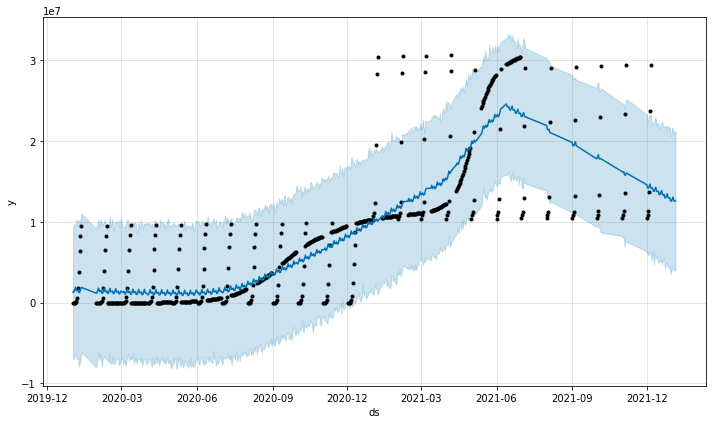

time: 337 ms (started: 2021-07-13 19:30:43 +00:00)


In [ ]:
model4.plot(forecast4);

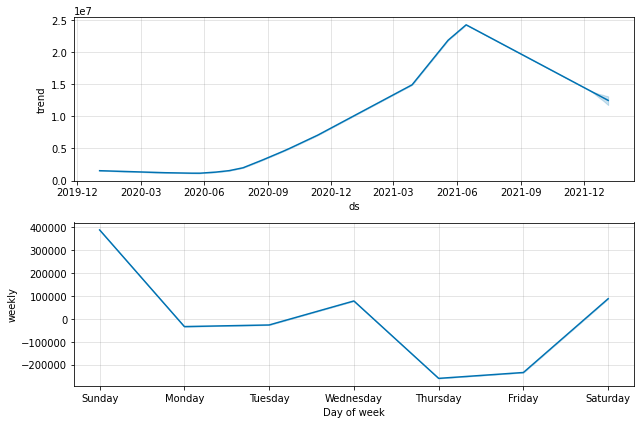

time: 586 ms (started: 2021-07-13 19:30:43 +00:00)


In [ ]:
model4.plot_components(forecast4);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


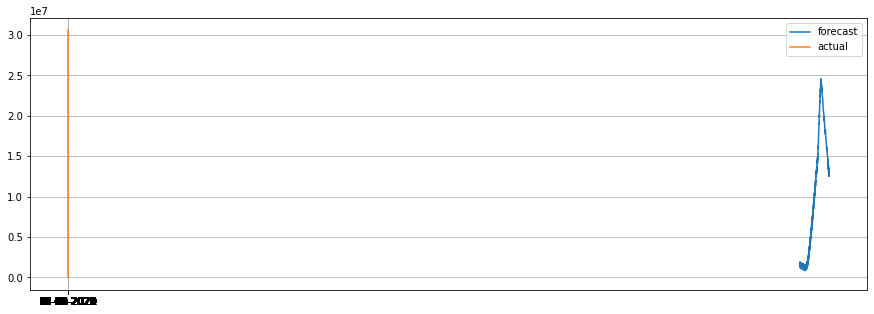

time: 4.72 s (started: 2021-07-13 19:30:44 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast4['ds'],forecast4['yhat'])
plt.plot(df_cases['ds'],df_cases['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv4 = cross_validation(model4, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv5 = cross_validation(model4, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-07-09 00:00:00



time: 17.8 s (started: 2021-07-13 19:30:48 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv4)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
127 146 days  7.235499e+14  2.689888e+07  ...  1.225134  1.241122  0.355556
128 147 days  7.268540e+14  2.696023e+07  ...  1.277897  1.241122  0.322222
129 148 days  7.123859e+14  2.669056e+07  ...  1.287415  1.237293  0.333333
130 149 days  6.988564e+14  2.643589e+07  ...  1.282580  1.183846  0.333333
131 150 days  6.923062e+14  2.631171e+07  ...  1.279940  1.125267  0.322222

[5 rows x 7 columns]

time: 249 ms (started: 2021-07-13 19:31:06 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv5)
df_p.tail()

horizon           mse          rmse  ...          mape     mdape  coverage
131 146 days  5.065705e+13  7.117376e+06  ...  67951.414881  1.015481  0.286822
132 147 days  6.324704e+13  7.952801e+06  ...  67951.341003  1.015481  0.263566
133 148 days  7.767755e+13  8.813487e+06  ...  67951.250019  1.009857  0.248062
134 149 days  7.717658e+13  8.785020e+06  ...  67951.184750  0.996179  0.255814
135 150 days  7.654129e+13  8.748788e+06  ...  67951.116900  0.996179  0.263566

[5 rows x 7 columns]

time: 230 ms (started: 2021-07-13 19:31:07 +00:00)


VI. Visualize the Performance Metrics

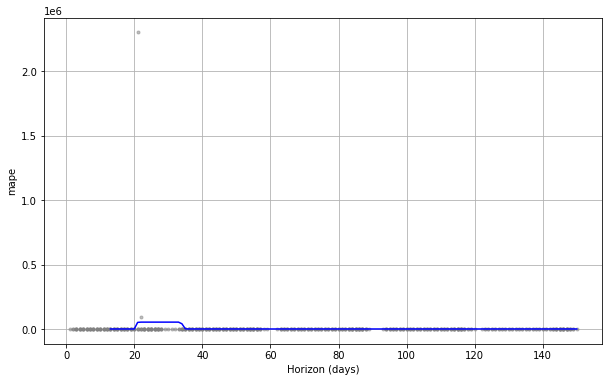

time: 251 ms (started: 2021-07-13 19:31:07 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv4, metric='mape')

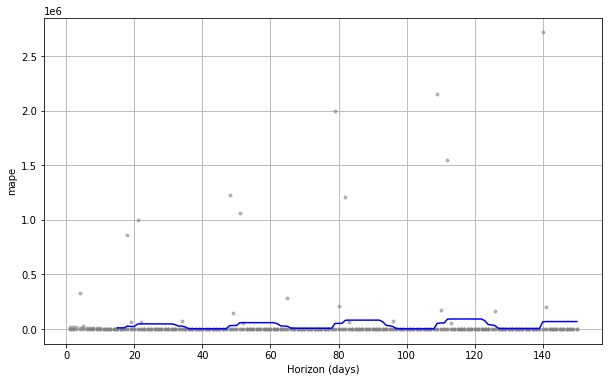

time: 270 ms (started: 2021-07-13 19:31:07 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv5, metric='mape')

**Total Deaths in India**


---



I. Data Preproccessing With Time series

In [ ]:
df_death = data.query("location=='India'")[['date','total_deaths']].rename({'date':'ds' , 'total_deaths':'y'} , axis=1)
df_death.dropna(subset = ["y"], inplace=True)
df_death.head()

ds    y
39392  11-03-2020  1.0
39393  12-03-2020  1.0
39394  13-03-2020  2.0
39395  14-03-2020  2.0
39396  15-03-2020  2.0

time: 33.3 ms (started: 2021-07-13 19:31:07 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model5 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model5.fit(df_death)
future = model5.make_future_dataframe(periods=30)
future
forecast5 = model5.predict(future)
forecast5[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat    yhat_lower     yhat_upper
0   2020-01-04   47981.218256 -66405.338729  157516.916950
1   2020-01-05   51830.179488 -52987.779034  162426.757974
2   2020-01-06   47063.722430 -55374.765839  159730.592848
3   2020-01-07   45076.870998 -57296.628392  151393.847401
4   2020-01-08   49402.219777 -50442.166807  154667.469068
..         ...            ...           ...            ...
506 2022-01-01  167742.705938  67282.070300  263927.067132
507 2022-01-02  171225.824812  63757.059780  276390.258939
508 2022-01-03  166093.525397  53519.096672  274004.828575
509 2022-01-04  163740.831609  52343.403787  275391.762966
510 2022-01-05  167700.338030  60504.596727  271573.801816

[511 rows x 4 columns]

time: 2.25 s (started: 2021-07-13 19:31:07 +00:00)


III. Plotting The Forecasts

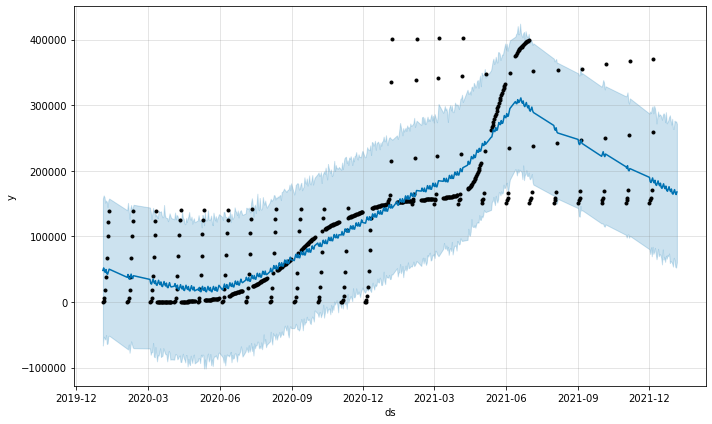

time: 330 ms (started: 2021-07-13 19:31:10 +00:00)


In [ ]:
model5.plot(forecast5);

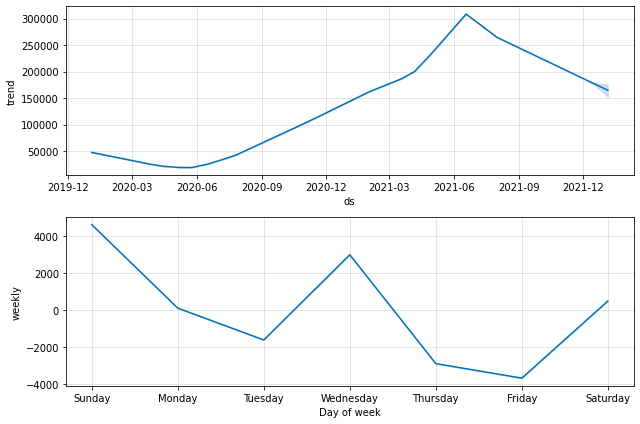

time: 578 ms (started: 2021-07-13 19:31:10 +00:00)


In [ ]:
model5.plot_components(forecast5);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


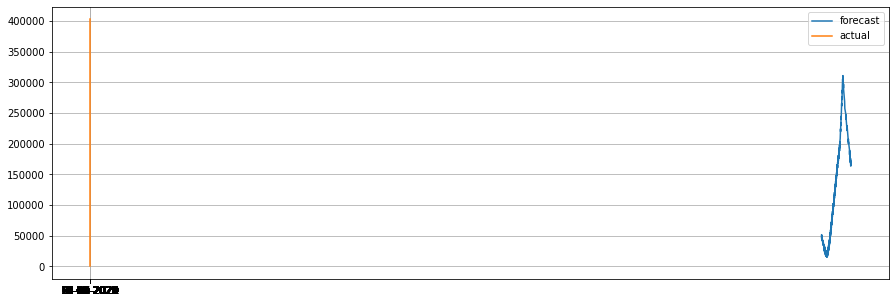

time: 4.46 s (started: 2021-07-13 19:31:11 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast5['ds'],forecast5['yhat'])
plt.plot(df_death['ds'],df_death['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv6 = cross_validation(model5, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv7 = cross_validation(model5, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-07-09 00:00:00



time: 18.8 s (started: 2021-07-13 19:31:15 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv6)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
127 146 days  8.151348e+10  285505.659124  ...  0.978047  1.000005  0.444444
128 147 days  8.307270e+10  288223.344552  ...  1.024260  1.000005  0.433333
129 148 days  8.319902e+10  288442.403643  ...  1.044152  0.916312  0.444444
130 149 days  8.356472e+10  289075.637261  ...  1.055640  0.916312  0.422222
131 150 days  8.351677e+10  288992.689172  ...  1.057539  0.669305  0.411111

[5 rows x 7 columns]

time: 251 ms (started: 2021-07-13 19:31:34 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv7)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
131 146 days  7.633703e+09   87371.063514  ...  8.113862  0.458947  0.625000
132 147 days  9.307183e+09   96473.743324  ...  8.127783  0.528516  0.591667
133 148 days  1.178643e+10  108565.323638  ...  8.143182  0.562297  0.566667
134 149 days  1.202203e+10  109645.030901  ...  8.154194  0.664575  0.558333
135 150 days  1.237449e+10  111240.703379  ...  8.168991  0.684984  0.550000

[5 rows x 7 columns]

time: 265 ms (started: 2021-07-13 19:31:34 +00:00)


VI. Visualize the Performance Metrics

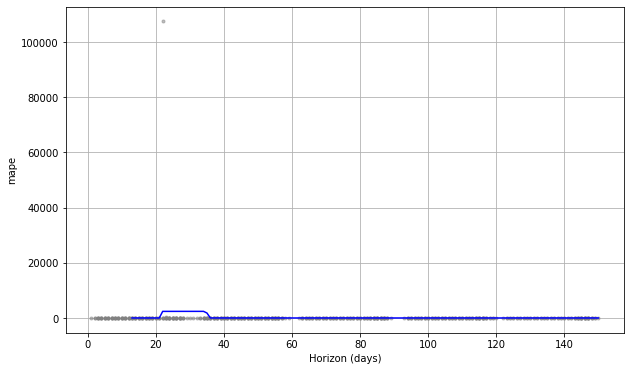

time: 256 ms (started: 2021-07-13 19:31:34 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv6, metric='mape')

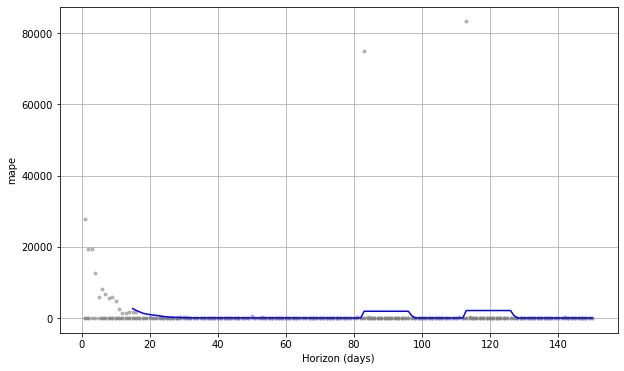

time: 260 ms (started: 2021-07-13 19:31:35 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv7, metric='mape')

**Total Vaccinated People in India**


---






I. Data Preproccessing With Time series

In [ ]:
df_vaccination = data.query("location=='India'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
39351  30-01-2020  1.0
39352  31-01-2020  1.0
39353  01-02-2020  1.0
39354  02-02-2020  2.0
39355  03-02-2020  3.0

time: 37 ms (started: 2021-07-13 19:31:35 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model6 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model6.fit(df_vaccination)
future = model6.make_future_dataframe(periods=30)
future
forecast6 = model6.predict(future)
forecast6[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-02 -1.692056e+08 -3.318665e+08 -9.998309e+06
1   2020-01-03 -1.831723e+08 -3.386077e+08 -2.320634e+07
2   2020-01-04 -1.737984e+08 -3.214346e+08 -5.533356e+06
3   2020-01-05 -1.562333e+08 -3.213411e+08  1.456068e+07
4   2020-01-06 -1.659716e+08 -3.303538e+08 -3.004589e+06
..         ...           ...           ...           ...
547 2022-01-01  5.879553e+07 -1.033316e+08  2.191439e+08
548 2022-01-02  7.505568e+07 -9.021732e+07  2.413248e+08
549 2022-01-03  6.401226e+07 -1.092624e+08  2.167317e+08
550 2022-01-04  5.869576e+07 -1.044968e+08  2.123797e+08
551 2022-01-05  6.841678e+07 -9.676147e+07  2.340533e+08

[552 rows x 4 columns]

time: 2.19 s (started: 2021-07-13 19:31:35 +00:00)


III. Plotting The Forecasts

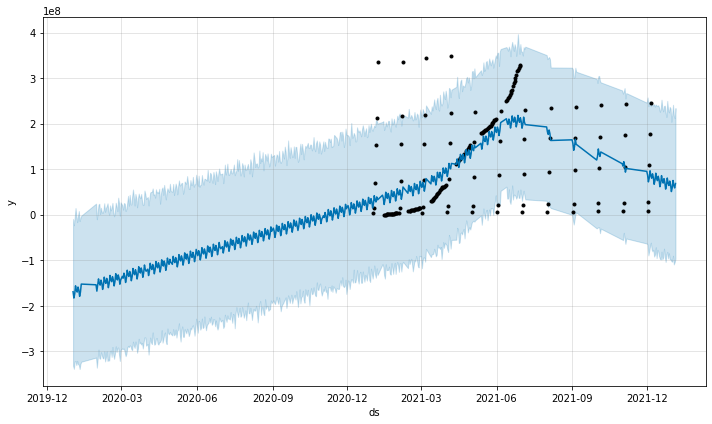

time: 336 ms (started: 2021-07-13 19:31:37 +00:00)


In [ ]:
model6.plot(forecast6);

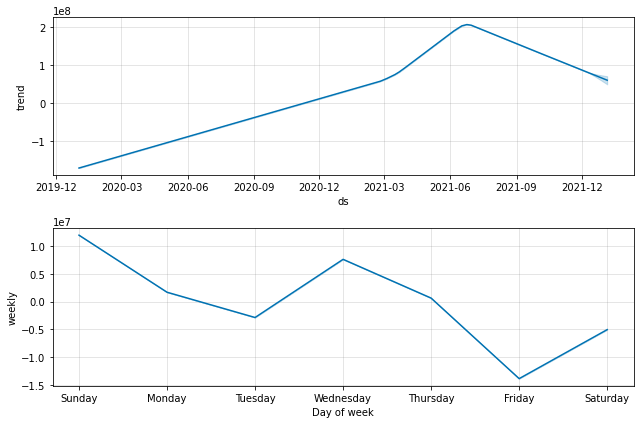

time: 549 ms (started: 2021-07-13 19:31:38 +00:00)


In [ ]:
model6.plot_components(forecast6);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


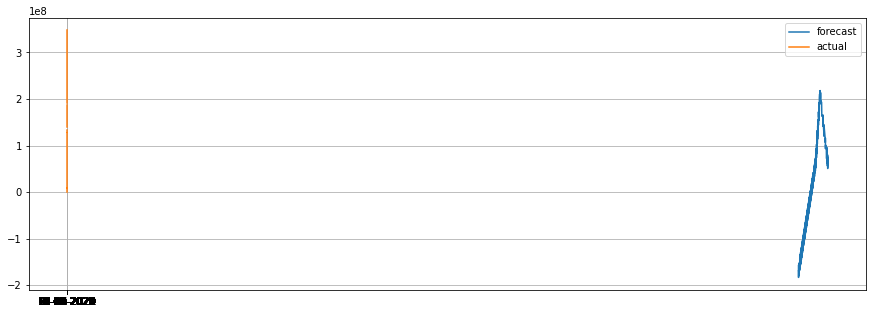

time: 4.94 s (started: 2021-07-13 19:31:38 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast6['ds'],forecast6['yhat'])
plt.plot(df_vaccination['ds'],df_vaccination['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv8 = cross_validation(model6, initial='30 days', period='15 days', horizon = '30 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])

INFO:fbprophet:Making 19 forecasts with cutoffs between 2021-02-09 00:00:00 and 2021-11-06 00:00:00



time: 42.9 s (started: 2021-07-13 19:31:43 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv8)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
22 26 days  2.113749e+16  1.453874e+08  ...  2.645878  0.856934  0.820000
23 27 days  9.467443e+15  9.730078e+07  ...  1.159608  0.533185  0.920000
24 28 days  6.381882e+15  7.988668e+07  ...  0.741481  0.472294  0.969231
25 29 days  7.223073e+15  8.498866e+07  ...  0.488106  0.447927  0.920000
26 30 days  9.745518e+15  9.871939e+07  ...  0.490727  0.447927  0.840000

[5 rows x 7 columns]

time: 129 ms (started: 2021-07-13 19:32:26 +00:00)


VI. Visualize the Performance Metrics

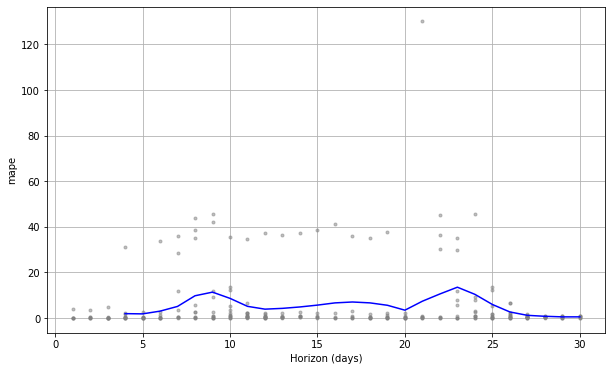

time: 263 ms (started: 2021-07-13 19:32:26 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv8, metric='mape')

## B. United States

**Total Covid 19 cases in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_cases_us = data.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)
df_cases_us.dropna(subset = ["y"], inplace=True)
df_cases_us.head()

ds    y
90782  22-01-2020  1.0
90783  23-01-2020  1.0
90784  24-01-2020  2.0
90785  25-01-2020  2.0
90786  26-01-2020  5.0

time: 41.1 ms (started: 2021-07-13 19:32:26 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model7 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model7.fit(df_cases_us)
future = model7.make_future_dataframe(periods=30)
future
forecast7 = model7.predict(future)
forecast7[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-02  2.092578e+06 -4.407478e+06  8.934995e+06
1   2020-01-03  2.073283e+06 -4.371127e+06  8.707065e+06
2   2020-01-04  2.385918e+06 -4.064766e+06  8.635299e+06
3   2020-01-05  2.638556e+06 -4.242477e+06  9.592379e+06
4   2020-01-06  2.078655e+06 -4.775303e+06  9.117286e+06
..         ...           ...           ...           ...
555 2022-01-01  2.847375e+07  2.173865e+07  3.563473e+07
556 2022-01-02  2.871585e+07  2.241645e+07  3.519866e+07
557 2022-01-03  2.814540e+07  2.138645e+07  3.492712e+07
558 2022-01-04  2.831863e+07  2.187327e+07  3.538217e+07
559 2022-01-05  2.828257e+07  2.164100e+07  3.483734e+07

[560 rows x 4 columns]

time: 2.39 s (started: 2021-07-13 19:32:27 +00:00)


III. Plotting The Forecasts

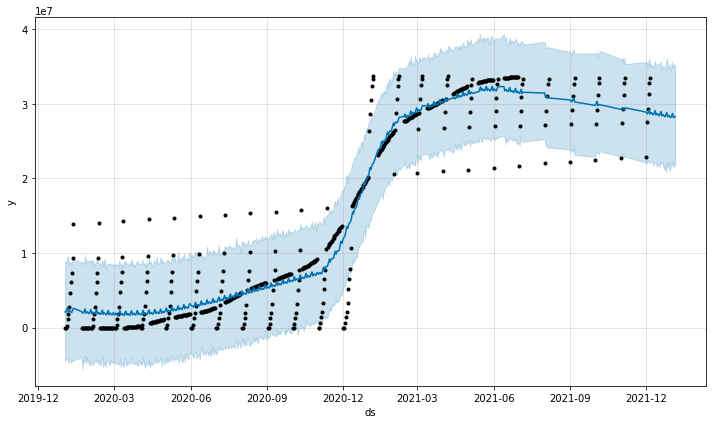

time: 311 ms (started: 2021-07-13 19:32:29 +00:00)


In [ ]:
model7.plot(forecast7);

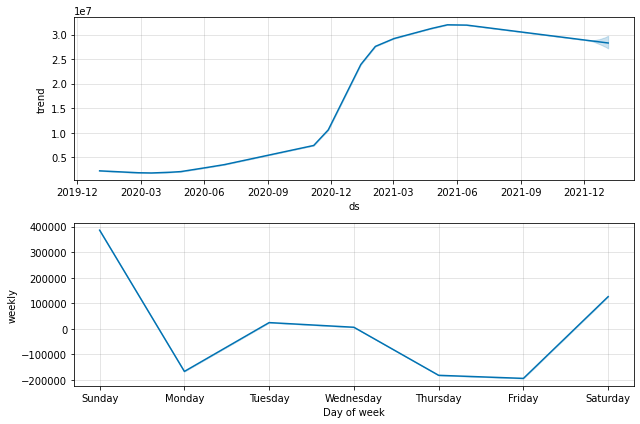

time: 586 ms (started: 2021-07-13 19:32:29 +00:00)


In [ ]:
model7.plot_components(forecast7);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


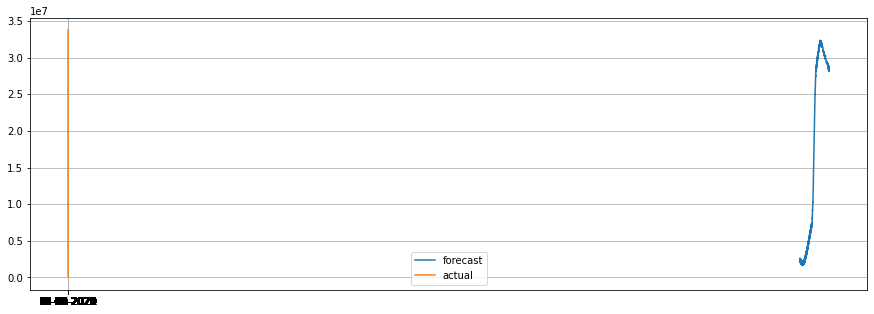

time: 4.93 s (started: 2021-07-13 19:32:30 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast7['ds'],forecast7['yhat'])
plt.plot(df_cases_us['ds'],df_cases_us['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv9 = cross_validation(model7, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv10 = cross_validation(model7, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-07-09 00:00:00



time: 20.8 s (started: 2021-07-13 19:32:35 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv9)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
127 146 days  3.103594e+15  5.570991e+07  ...  1.461323  0.674621  0.155556
128 147 days  2.934596e+15  5.417192e+07  ...  1.386656  0.671529  0.222222
129 148 days  2.713276e+15  5.208911e+07  ...  1.300056  0.656382  0.288889
130 149 days  2.558842e+15  5.058500e+07  ...  1.236788  0.656169  0.333333
131 150 days  2.480925e+15  4.980888e+07  ...  1.203522  0.649863  0.355556

[5 rows x 7 columns]

time: 263 ms (started: 2021-07-13 19:32:56 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv10)
df_p.tail()

horizon           mse          rmse  ...          mape     mdape  coverage
131 146 days  1.636007e+14  1.279065e+07  ...  39081.819046  0.569513  0.317829
132 147 days  1.755079e+14  1.324794e+07  ...  39081.803898  0.588170  0.317829
133 148 days  1.867232e+14  1.366467e+07  ...  39081.768247  0.588220  0.341085
134 149 days  1.845265e+14  1.358405e+07  ...  39081.735070  0.588220  0.372093
135 150 days  1.803513e+14  1.342950e+07  ...  39081.687882  0.588170  0.403101

[5 rows x 7 columns]

time: 238 ms (started: 2021-07-13 19:32:56 +00:00)


VI. Visualize the Performance Metrics

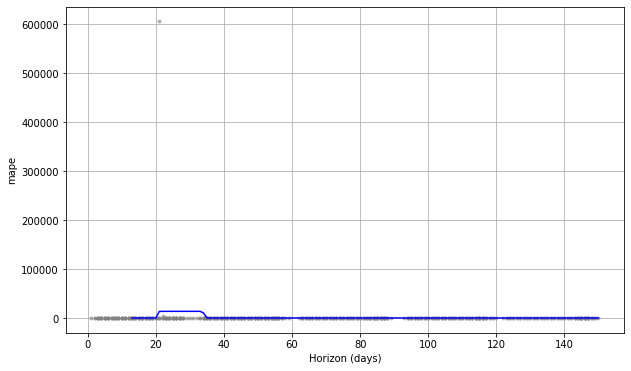

time: 271 ms (started: 2021-07-13 19:32:56 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv9, metric='mape')

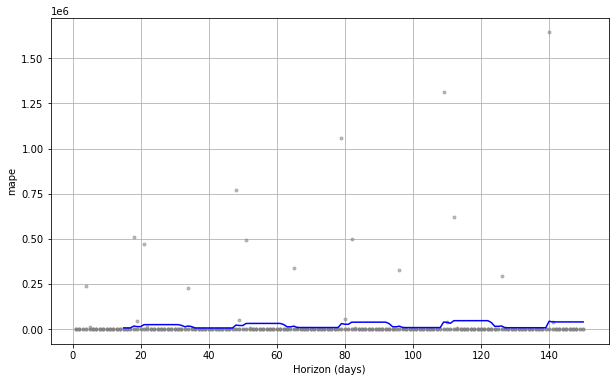

time: 291 ms (started: 2021-07-13 19:32:56 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv10, metric='mape')

**Total Deaths in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_death_USA = data.query("location=='United States'")[['date','total_deaths']].rename({'date':'ds','total_deaths':'y'},axis=1)
df_death_USA.dropna(subset = ["y"], inplace=True)
df_death_USA.head()

ds     y
90820  29-02-2020   1.0
90821  01-03-2020   1.0
90822  02-03-2020   6.0
90823  03-03-2020   7.0
90824  04-03-2020  11.0

time: 41.1 ms (started: 2021-07-13 19:32:57 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
from fbprophet import Prophet
model_USA = Prophet(interval_width=0.8 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
train_USA , test_USA = df_death_USA[30:500] , df_death_USA[500:]
model_USA.fit(train_USA) 
future_USA = model_USA.make_future_dataframe(periods=57)
forecast_USA = model_USA.predict(future_USA)
forecast_USA[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds           yhat     yhat_lower     yhat_upper
0   2020-01-04  155610.853718   79149.650475  233464.615782
1   2020-01-05  160848.413381   83999.213762  235786.200033
2   2020-01-06  151210.203783   69448.079942  228250.638405
3   2020-01-07  152414.447634   81553.105609  228109.715567
4   2020-01-08  154159.463744   77487.076946  233640.531988
..         ...            ...            ...            ...
514 2022-01-28  490748.481494  405387.862835  573051.446009
515 2022-01-29  492346.100502  412873.379600  571508.222140
516 2022-01-30  497732.816760  409134.075913  576660.442266
517 2022-01-31  488243.763757  409924.067871  565873.623370
518 2022-02-01  489597.164201  406864.877532  573082.705480

[519 rows x 4 columns]

time: 2.34 s (started: 2021-07-13 19:32:57 +00:00)


III. Plotting The Forecasts

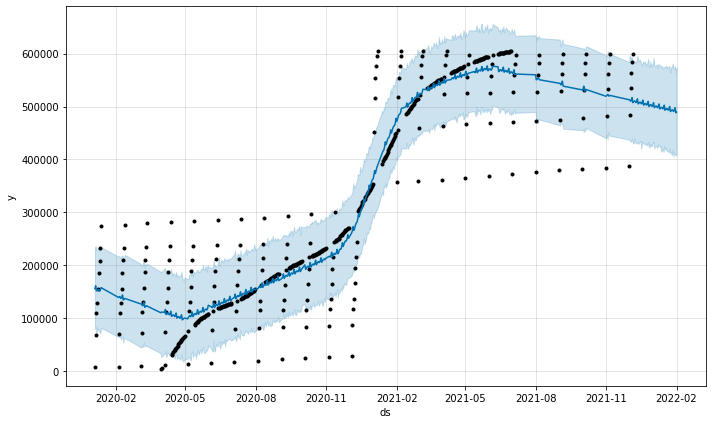

time: 326 ms (started: 2021-07-13 19:32:59 +00:00)


In [ ]:
model_USA.plot(forecast_USA);

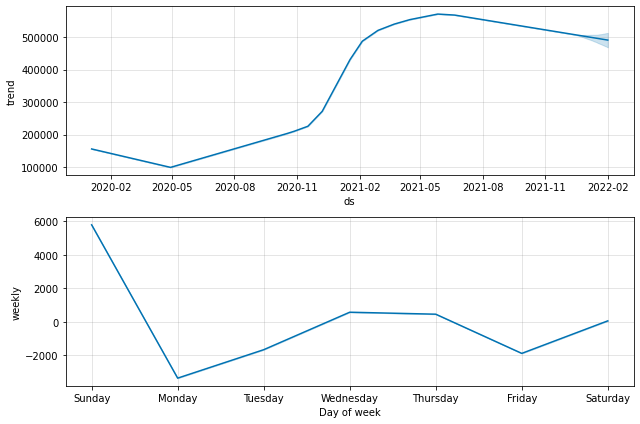

time: 498 ms (started: 2021-07-13 19:32:59 +00:00)


In [ ]:
model_USA.plot_components(forecast_USA);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


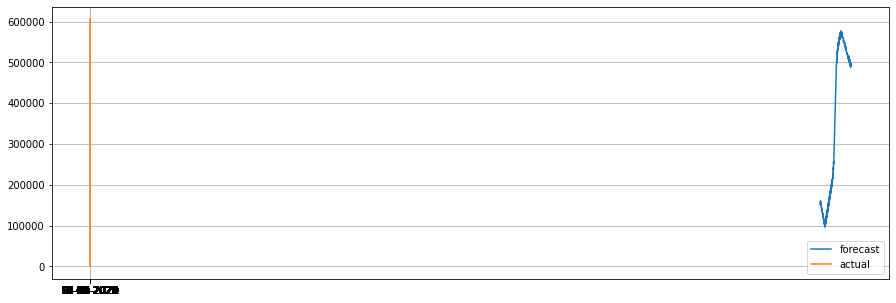

time: 4.55 s (started: 2021-07-13 19:33:00 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast_USA['ds'],forecast_USA['yhat'])
plt.plot(df_death_USA['ds'],df_death_USA['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv11 = cross_validation(model_USA, initial='300 days', period='60 days', horizon = '150 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])
df_cv12 = cross_validation(model_USA, cutoffs=cutoffs, horizon='150 days')

INFO:fbprophet:Making 5 forecasts with cutoffs between 2020-11-11 00:00:00 and 2021-07-09 00:00:00



time: 18.5 s (started: 2021-07-13 19:33:04 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv11)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
127 146 days  7.895962e+11  888592.231751  ...  1.312407  0.655586  0.022222
128 147 days  7.484343e+11  865120.975079  ...  1.252135  0.589099  0.066667
129 148 days  6.946141e+11  833435.131310  ...  1.181277  0.551932  0.111111
130 149 days  6.560504e+11  809969.398924  ...  1.126448  0.551001  0.155556
131 150 days  6.366001e+11  797872.207545  ...  1.097770  0.551001  0.177778

[5 rows x 7 columns]

time: 269 ms (started: 2021-07-13 19:33:23 +00:00)


In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv12)
df_p.tail()

horizon           mse           rmse  ...      mape     mdape  coverage
126 146 days  1.640878e+10  128096.754138  ...  0.691310  0.417607  0.512821
127 147 days  1.914523e+10  138366.275750  ...  0.693382  0.417607  0.461538
128 148 days  2.196020e+10  148189.747844  ...  0.690599  0.417607  0.435897
129 149 days  2.181158e+10  147687.437127  ...  0.684802  0.417607  0.435897
130 150 days  2.171995e+10  147376.882473  ...  0.684350  0.417607  0.427350

[5 rows x 7 columns]

time: 236 ms (started: 2021-07-13 19:33:23 +00:00)


VI. Visualize the Performance Metrics

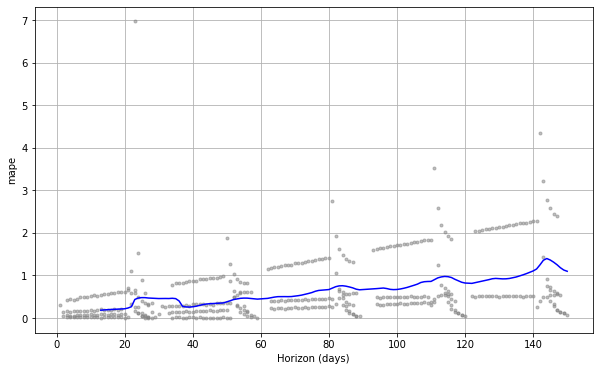

time: 272 ms (started: 2021-07-13 19:33:24 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv11, metric='mape')

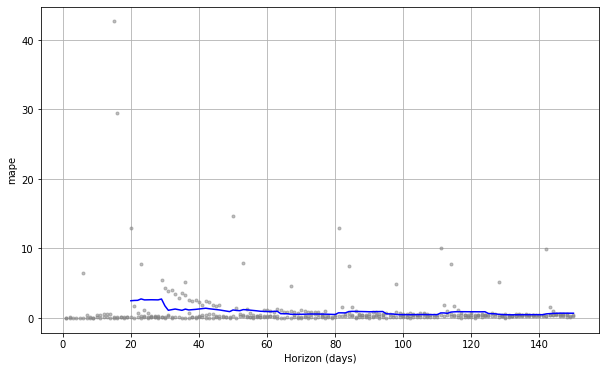

time: 255 ms (started: 2021-07-13 19:33:24 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv12, metric='mape')

**Total People Vaccinated in United States**


---



I. Data Preproccessing With Time series

In [ ]:
df_vaccination_us = data.query("location=='United States'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)
df_cases.dropna(subset = ["y"], inplace=True)
df_cases.head()

ds    y
39351  30-01-2020  1.0
39352  31-01-2020  1.0
39353  01-02-2020  1.0
39354  02-02-2020  2.0
39355  03-02-2020  3.0

time: 31.7 ms (started: 2021-07-13 19:33:24 +00:00)


II. Model Fitting and Obtaining The Forecasts

In [ ]:
model8 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.98)
model8.fit(df_vaccination_us)
future = model8.make_future_dataframe(periods=30)
future
forecast8 = model8.predict(future)
forecast8[['ds','yhat','yhat_lower','yhat_upper']]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds          yhat    yhat_lower    yhat_upper
0   2020-01-02 -4.781956e+08 -6.309832e+08 -3.004302e+08
1   2020-01-03 -4.693221e+08 -6.460709e+08 -3.074534e+08
2   2020-01-04 -4.686667e+08 -6.254279e+08 -2.935771e+08
3   2020-01-05 -4.571796e+08 -6.414266e+08 -2.844375e+08
4   2020-01-06 -4.608000e+08 -6.409629e+08 -2.961518e+08
..         ...           ...           ...           ...
555 2022-01-01  1.198032e+08 -6.801070e+07  2.857654e+08
556 2022-01-02  1.292505e+08 -4.234876e+07  2.961964e+08
557 2022-01-03  1.235903e+08 -4.790971e+07  2.947094e+08
558 2022-01-04  1.158291e+08 -5.599202e+07  2.909927e+08
559 2022-01-05  1.215930e+08 -4.713859e+07  2.984688e+08

[560 rows x 4 columns]

time: 2.17 s (started: 2021-07-13 19:33:24 +00:00)


III. Plotting The Forecasts

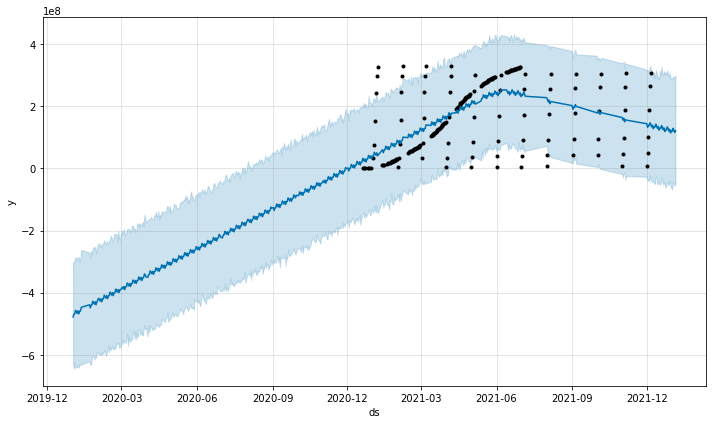

time: 319 ms (started: 2021-07-13 19:33:26 +00:00)


In [ ]:
model8.plot(forecast8);

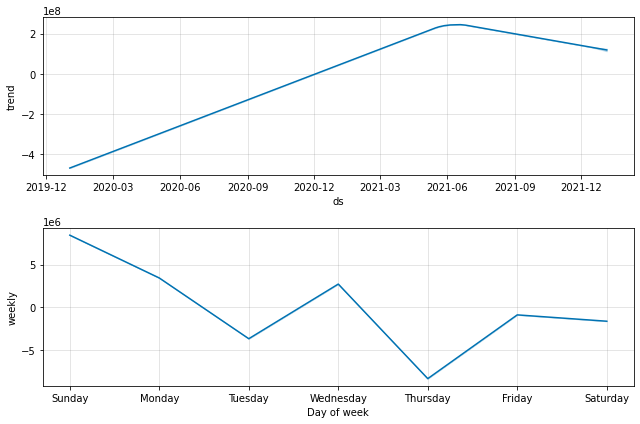

time: 531 ms (started: 2021-07-13 19:33:27 +00:00)


In [ ]:
model8.plot_components(forecast8);

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


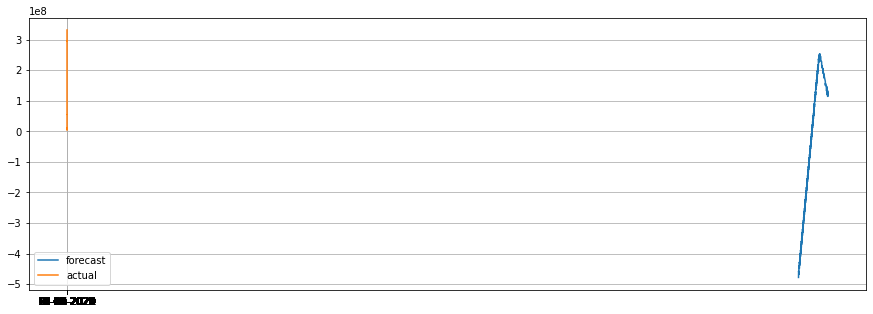

time: 4.87 s (started: 2021-07-13 19:33:27 +00:00)


In [ ]:
plt.figure(figsize=(15,5))
plt.plot(forecast8['ds'],forecast8['yhat'])
plt.plot(df_vaccination_us['ds'],df_vaccination_us['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])
plt.show()

IV. Cross Validation

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv13 = cross_validation(model6, initial='30 days', period='15 days', horizon = '30 days')
cutoffs = pd.to_datetime(['2020-03-15', '2020-05-29', '2020-08-12'])

INFO:fbprophet:Making 19 forecasts with cutoffs between 2021-02-09 00:00:00 and 2021-11-06 00:00:00



time: 41.8 s (started: 2021-07-13 19:33:32 +00:00)


V. Computing Performance Matrics

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv13)
df_p.tail()

horizon           mse          rmse  ...      mape     mdape  coverage
22 26 days  2.113749e+16  1.453874e+08  ...  2.645878  0.856934  0.820000
23 27 days  9.467443e+15  9.730078e+07  ...  1.159608  0.533185  0.920000
24 28 days  6.381882e+15  7.988668e+07  ...  0.741481  0.472294  0.969231
25 29 days  7.223073e+15  8.498866e+07  ...  0.488106  0.447927  0.920000
26 30 days  9.745518e+15  9.871939e+07  ...  0.490727  0.447927  0.840000

[5 rows x 7 columns]

time: 130 ms (started: 2021-07-13 19:34:14 +00:00)


VI. Visualize the Performance Metrics

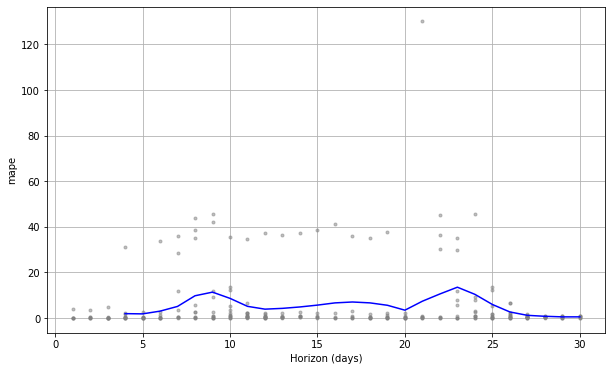

time: 252 ms (started: 2021-07-13 19:34:14 +00:00)


In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv13, metric='mape')

# 10. Conclusion

In [ ]:
#@title
!pip install ipython-autotime
%unload_ext autotime

Q.1] Which Country is having highest number of cases?

In [ ]:
maxid = df_new1[['Number of Cases']].idxmax()
loc = df_new1.loc[maxid]
print("Country of Highest Number of Covid-19 Cases\n",loc)

Country of Highest Number of Covid-19 Cases
             Location  Number of Cases
91311  United States         33717567


Q.2] Which Country is having Lowest number of cases?

In [ ]:
minid = df_new1[['Number of Cases']].idxmin()
loc = df_new1.loc[minid]
print("Country of Lowest Number of Covid-19 Cases\n",loc)

Country of Lowest Number of Covid-19 Cases
       Location  Number of Cases
0  Afghanistan                1


Q.3] Which Country is having Highest number of deaths?

In [ ]:
maxid = df_new3[['Number of Death']].idxmax()
loc = df_new3.loc[maxid]
print("Country of highest Number of Death\n",loc)

Country of highest Number of Death
             Location  Number of Death
91311  United States           605526


Q.4] Which Country is having Lowest number of Deaths?

In [ ]:
minid = df_new3[['Number of Death']].idxmin()
loc = df_new3.loc[minid]
print("Location of Lowest Number of Deaths\n",loc)

Location of Lowest Number of Deaths
        Location  Number of Death
27  Afghanistan                1


Q.5] Which Country is most Vaccinated?

In [ ]:
maxid = df_new5[['total_vaccinations']].idxmax()
loc = df_new5.loc[maxid]
print("Most Vaccinated Country\n",loc)

Most Vaccinated Country
       Location  total_vaccinations
18319    China          1305499000


Q.6] Which Country is least Vaccinated?

In [ ]:
minid = df_new5[['total_vaccinations']].idxmin()
loc = df_new5.loc[minid]
print("Lowest Vaccinated Country\n",loc)

Lowest Vaccinated Country
         Location  total_vaccinations
364  Afghanistan                   0


Q.7] Date of highest Number of Cases?

In [ ]:
maxid = df_new2[['Number of Cases']].idxmax()
loc = df_new2.loc[maxid]
print("Date of highest Number of Cases\n",loc)

Date of highest Number of Cases
             Date  Number of Cases
91311 2021-04-07         33717567


Q.8] Date of Lowest Number of Cases?

In [ ]:
minid = df_new2[['Number of Cases']].idxmin()
loc = df_new2.loc[minid]
print("Date of Lowest Number of Cases\n",loc)

Date of Lowest Number of Cases
         Date  Number of Cases
0 2020-02-24                1


Q.9] Date of highest Number of Death?

In [ ]:
maxid = df_new4[['Number of Death']].idxmax()
loc = df_new4.loc[maxid]
print("Country of highest Number of Death\n",loc)

Country of highest Number of Death
             Date  Number of Death
91311 2021-04-07           605526


Q.10] Date of Lowest Number of Death?

In [ ]:
minid = df_new4[['Number of Death']].idxmin()
loc = df_new4.loc[minid]
print("Location of Lowest Number of Deaths\n",loc)

Location of Lowest Number of Deaths
          Date  Number of Death
27 2020-03-22                1


Q.11] Date of maximum people vaccinated?

In [ ]:
maxid = df_new6[['total_vaccinations']].idxmax()
loc = df_new6.loc[maxid]
print("Date of maximum people vaccinated\n",loc)

Date of maximum people vaccinated
             Date  total_vaccinations
18319 2021-04-07          1305499000


Q.12] Date of minimum people vaccinated?

In [ ]:
minid = df_new6[['total_vaccinations']].idxmin()
loc = df_new6.loc[minid]
print("Date of minimum people vaccinated\n",loc)

Date of minimum people vaccinated
           Date  total_vaccinations
364 2021-02-22                   0


Q.13] Mean of total cases in country?

In [ ]:
mean = df_new1.mean()
print("Mean of total cases\n",mean)

Mean of total cases
 Number of Cases    355088.268834
dtype: float64


Q.14] Mean of total death cases in country?

In [ ]:
mean = df_new3.mean()
print("Mean of total death cases\n",mean)

Mean of total death cases
 Number of Death    9572.846639
dtype: float64


Q.15] Mean of total vaccination in country?

In [ ]:
mean = df_new5.mean()
print("Mean of total vaccination\n",mean)

Mean of total vaccination
 total_vaccinations    1.083354e+07
dtype: float64




---



---



---



---


# 11. Case Study Part III 
(OPTIONAL)

# BASED ON NEW DATASET

**CLICK HERE TO DOWNLOAD DATASET :-** [owid-covid-data.csv](https://drive.google.com/file/d/1ekLYQiVvOihzcFRe203J-oXeiAC-m68F/view?usp=sharing)

(*NOTE * Upload the Dataset in colab files or running directory*)





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#df_n = pd.read_csv('/content/owid-covid-data.csv' , parse_dates=[3])

df_n = pd.read_csv("/content/drive/MyDrive/major project/owid-covid-data.csv", parse_dates=[3])
df_n
         

iso_code continent  ... human_development_index excess_mortality
0           AFG      Asia  ...                   0.511              NaN
1           AFG      Asia  ...                   0.511              NaN
2           AFG      Asia  ...                   0.511              NaN
3           AFG      Asia  ...                   0.511              NaN
4           AFG      Asia  ...                   0.511              NaN
...         ...       ...  ...                     ...              ...
100185      ZWE    Africa  ...                   0.571              NaN
100186      ZWE    Africa  ...                   0.571              NaN
100187      ZWE    Africa  ...                   0.571              NaN
100188      ZWE    Africa  ...                   0.571              NaN
100189      ZWE    Africa  ...                   0.571              NaN

[100190 rows x 60 columns]

In [ ]:
df_n.head()

iso_code continent  ... human_development_index excess_mortality
0      AFG      Asia  ...                   0.511              NaN
1      AFG      Asia  ...                   0.511              NaN
2      AFG      Asia  ...                   0.511              NaN
3      AFG      Asia  ...                   0.511              NaN
4      AFG      Asia  ...                   0.511              NaN

[5 rows x 60 columns]

In [ ]:
df_n.tail()

iso_code continent  ... human_development_index excess_mortality
100185      ZWE    Africa  ...                   0.571              NaN
100186      ZWE    Africa  ...                   0.571              NaN
100187      ZWE    Africa  ...                   0.571              NaN
100188      ZWE    Africa  ...                   0.571              NaN
100189      ZWE    Africa  ...                   0.571              NaN

[5 rows x 60 columns]

In [ ]:
df_n['continent'].value_counts()

Africa           25791
Europe           23742
Asia             23714
North America    12409
South America     6015
Oceania           3823
Name: continent, dtype: int64

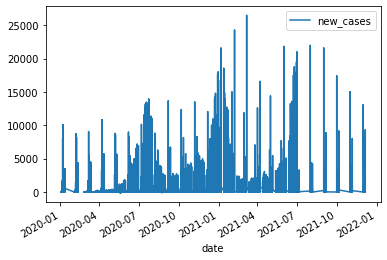

In [ ]:
df_n.set_index('date').query("continent == 'Africa'")[['new_cases']].plot()

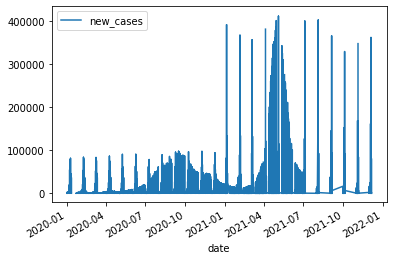

In [ ]:
df_n.set_index('date').query("continent=='Asia'")[['new_cases']].plot()

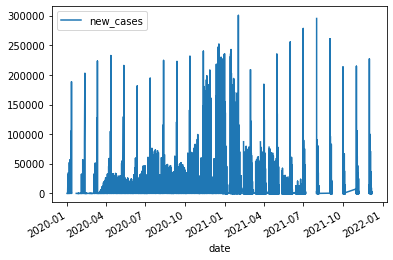

In [ ]:
df_n.set_index('date').query("continent=='North America'")[['new_cases']].plot()

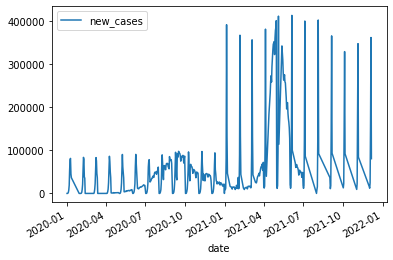

In [ ]:
df_n.set_index('date').query("location=='India'")[['new_cases']].plot()

In [ ]:
df_new_cases = df_n.copy()

In [ ]:
df_new_cases['new_cases']

0            1.0
1            0.0
2            0.0
3            0.0
4            0.0
           ...  
100185    1331.0
100186    1357.0
100187    1442.0
100188    1002.0
100189     809.0
Name: new_cases, Length: 100190, dtype: float64

In [ ]:
df_new_cases['date'].value_counts()

2021-05-27    225
2021-05-26    225
2021-05-25    225
2021-05-24    224
2021-05-29    224
             ... 
2020-05-01      3
2020-04-01      3
2020-02-01      2
2020-03-01      2
2020-01-01      2
Name: date, Length: 551, dtype: int64

In [ ]:
df_2 =  df_new_cases.date.unique()

In [ ]:
dates = {'date' : df_2}

In [ ]:
df_2 = pd.DataFrame(df_2 , columns= ['date'])

In [ ]:
df_2.head()

date
0 2020-02-24
1 2020-02-25
2 2020-02-26
3 2020-02-27
4 2020-02-28

In [ ]:
df_2.tail()

date
546 2020-08-02
547 2020-09-02
548 2020-10-02
549 2020-11-02
550 2020-12-02

In [ ]:
df_new_cases['new_cases'] = df_new_cases['new_cases'].replace('nan', np.nan).fillna(0)
df_new_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100190 entries, 0 to 100189
Data columns (total 60 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   iso_code                               100190 non-null  object        
 1   continent                              95494 non-null   object        
 2   location                               100190 non-null  object        
 3   date                                   100190 non-null  datetime64[ns]
 4   total_cases                            96584 non-null   float64       
 5   new_cases                              100190 non-null  float64       
 6   new_cases_smoothed                     95571 non-null   float64       
 7   total_deaths                           86431 non-null   float64       
 8   new_deaths                             86587 non-null   float64       
 9   new_deaths_smoothed                    95571 non

In [ ]:
df_3 = df_new_cases.groupby(['date']).sum()

In [ ]:
df_3 = df_3['new_cases']

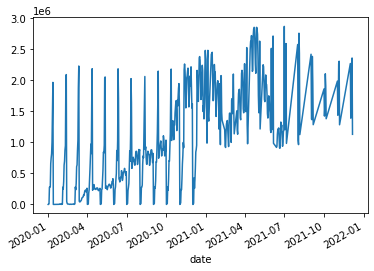

In [ ]:
df_3.plot()

In [ ]:
len(df_3)

551

In [ ]:
df_3 = pd.DataFrame(df_3)


In [ ]:
df_3 = df_3.reset_index()[['date' , 'new_cases']].rename({'date' : 'ds' , 'new_cases' : 'y'} , axis = 'columns')

In [ ]:
from fbprophet import Prophet

In [ ]:
model1 = Prophet(interval_width=0.95 , changepoint_prior_scale=0.5 , changepoint_range=0.90)

In [ ]:
model1.fit(df_3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_new_cases = model1.make_future_dataframe(periods=30)

In [ ]:
future_new_cases.tail()

ds
576 2022-01-01
577 2022-01-02
578 2022-01-03
579 2022-01-04
580 2022-01-05

In [ ]:
pred_new_cases = model1.predict(future_new_cases)

In [ ]:
pred_new_cases.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
576 2022-01-01  1.656153e+06  ...                         0.0  1.663908e+06
577 2022-01-02  1.655759e+06  ...                         0.0  1.530728e+06
578 2022-01-03  1.655365e+06  ...                         0.0  1.558991e+06
579 2022-01-04  1.654972e+06  ...                         0.0  1.630017e+06
580 2022-01-05  1.654578e+06  ...                         0.0  1.739084e+06

[5 rows x 16 columns]

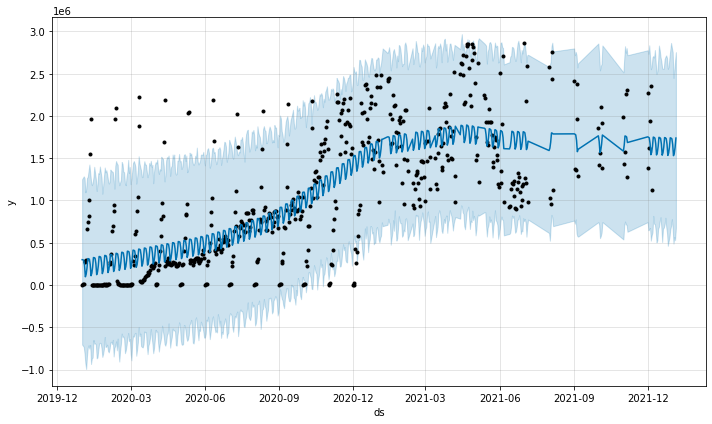

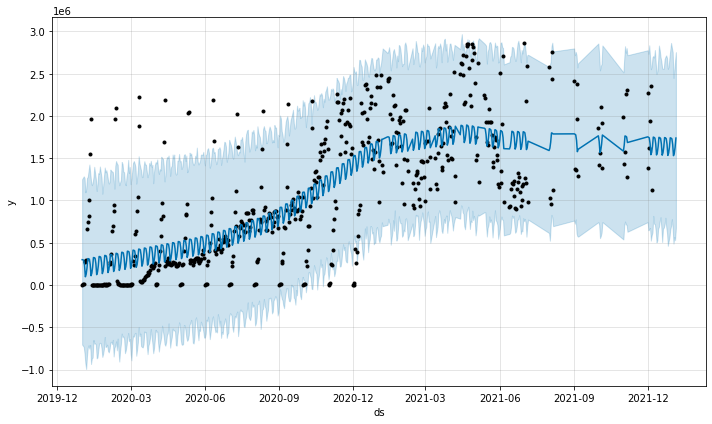

In [ ]:
model1.plot(pred_new_cases)

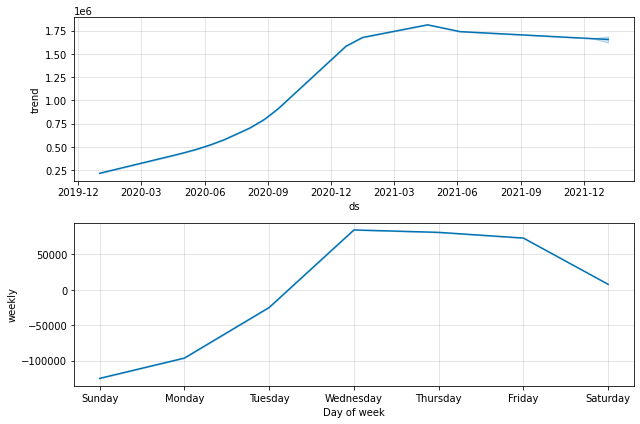

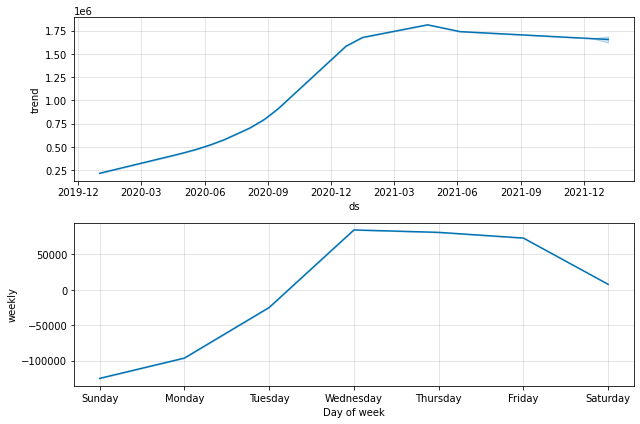

In [ ]:
model1.plot_components(pred_new_cases)

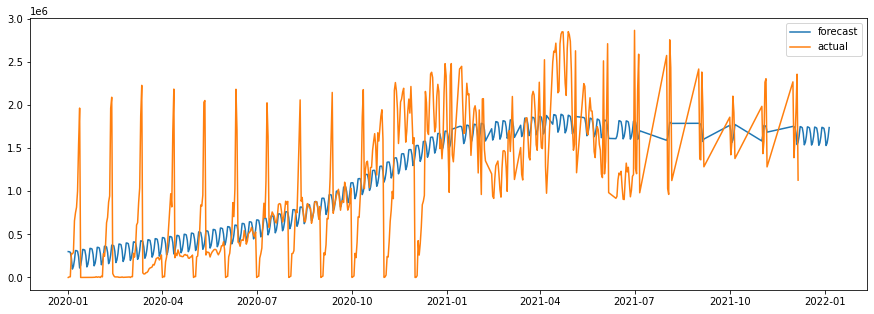

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_new_cases['ds'], pred_new_cases['yhat'])
plt.plot(df_3['ds'],df_3['y'])
plt.legend(labels=['forecast','actual'])


In [ ]:
df_4 = df_n.groupby(['date']).sum()

In [ ]:
df_4 = df_4['new_deaths']

In [ ]:
df_4 = pd.DataFrame(df_4)

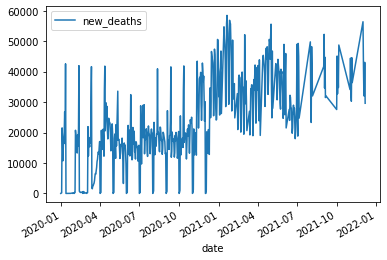

In [ ]:
df_4.plot()

In [ ]:
df_4 = df_4.reset_index()[['date' , 'new_deaths']].rename({'date' : 'ds' , 'new_deaths' : 'y'} , axis = 'columns')

In [ ]:
model2 = Prophet(interval_width=0.75 , changepoint_prior_scale=0.5 , changepoint_range=0.90)

In [ ]:
model2.fit(df_4)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future_1 = model2.make_future_dataframe(periods=30)

In [ ]:
future_1.tail()

ds
576 2022-01-01
577 2022-01-02
578 2022-01-03
579 2022-01-04
580 2022-01-05

In [ ]:
pred_new_deaths = model2.predict(future_1)

In [ ]:
pred_new_deaths.tail()

ds         trend  ...  multiplicative_terms_upper          yhat
576 2022-01-01  38788.575367  ...                         0.0  38399.730853
577 2022-01-02  38810.680608  ...                         0.0  34921.488128
578 2022-01-03  38832.785848  ...                         0.0  35548.467796
579 2022-01-04  38854.891088  ...                         0.0  40648.496525
580 2022-01-05  38876.996329  ...                         0.0  42170.690567

[5 rows x 16 columns]

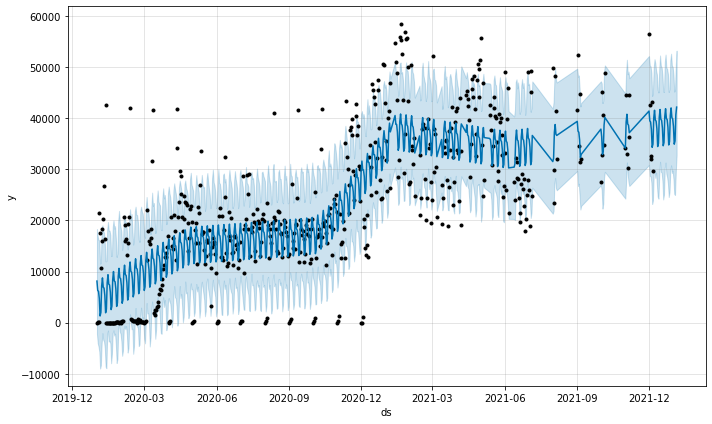

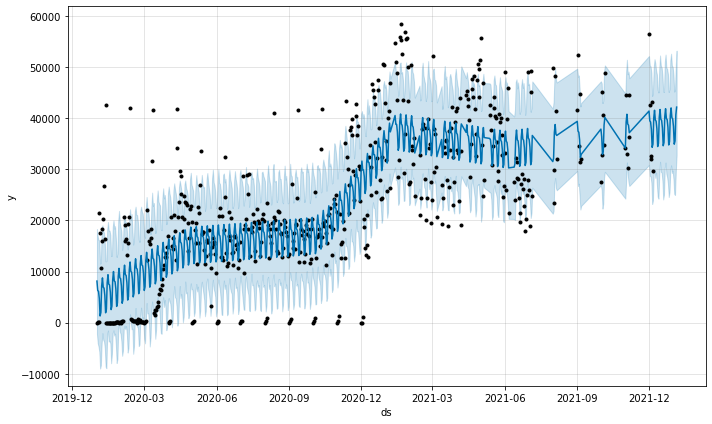

In [ ]:
model2.plot(pred_new_deaths)

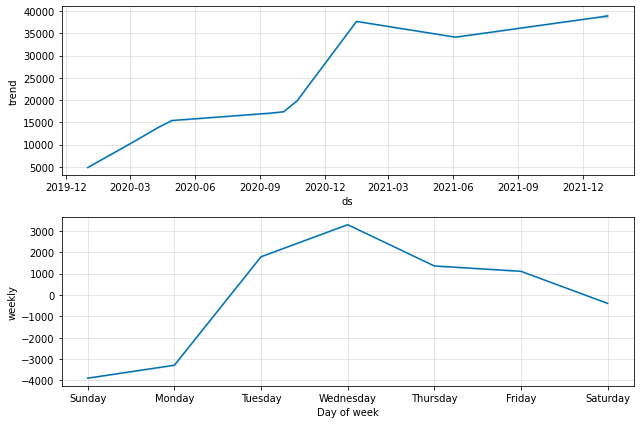

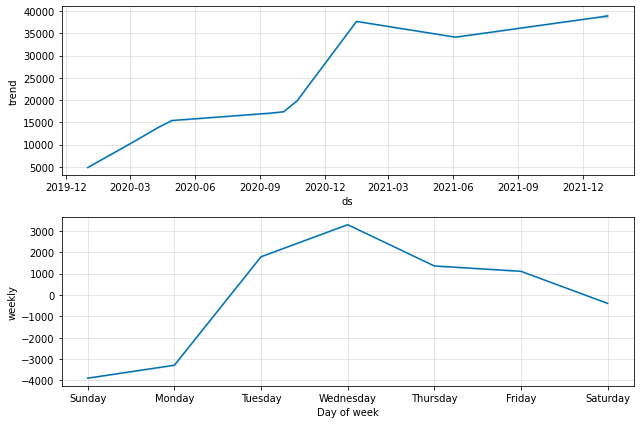

In [ ]:
model2.plot_components(pred_new_deaths)

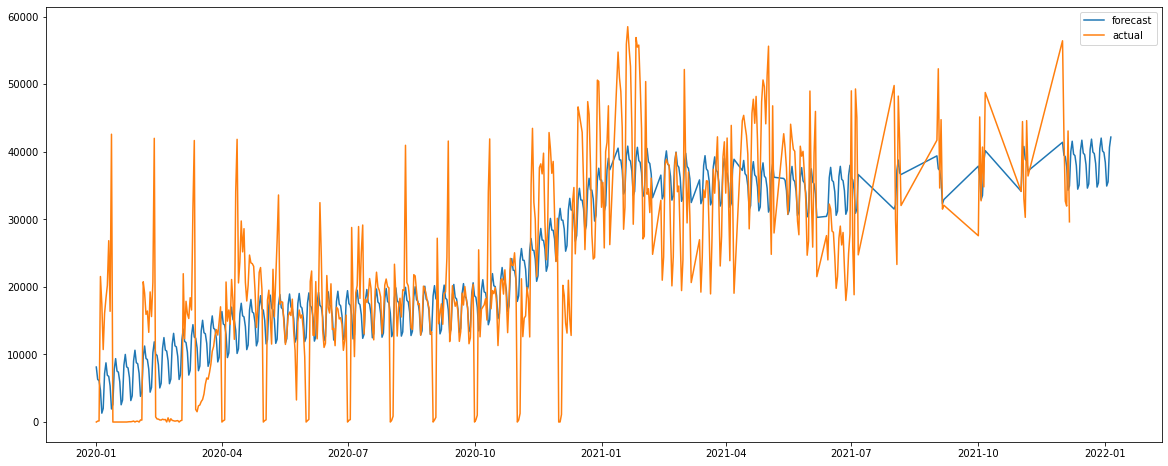

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(pred_new_deaths['ds'], pred_new_deaths['yhat'])
plt.plot(df_4['ds'],df_4['y'])
plt.legend(labels=['forecast','actual'])

 ### B. United States

In [ ]:
df_5 = df_n[(df_n['date'] == '2021-07-04')]

In [ ]:
df_5.head()

iso_code continent  ... human_development_index excess_mortality
408        AFG      Asia  ...                   0.511              NaN
916   OWID_AFR       NaN  ...                     NaN              NaN
1412       ALB    Europe  ...                   0.795              NaN
1908       DZA    Africa  ...                   0.748              NaN
2398       AND    Europe  ...                   0.868              NaN

[5 rows x 60 columns]

In [ ]:
df_5 = df_5.sort_values('new_cases' , ascending= False)

In [ ]:
df_5.head(10)

iso_code      continent  ... human_development_index excess_mortality
98704  OWID_WRL            NaN  ...                   0.737              NaN
5159   OWID_ASI            NaN  ...                     NaN              NaN
30572  OWID_EUR            NaN  ...                     NaN              NaN
83728  OWID_SAM            NaN  ...                     NaN              NaN
41880       IND           Asia  ...                   0.645              NaN
31101  OWID_EUN            NaN  ...                     NaN              NaN
13147       BRA  South America  ...                   0.765              NaN
66660  OWID_NAM            NaN  ...                     NaN              NaN
95389       USA  North America  ...                   0.926              NaN
92644       TUR           Asia  ...                   0.820              NaN

[10 rows x 60 columns]

In [ ]:
df_5 = df_5.drop([98704,5159,83728,31101,13147])

In [ ]:
import plotly.express as px

fig = px.bar(df_5, x='location', y='new_cases',
             hover_data=['location', 'new_cases'], color='new_cases',text = df_5.new_cases,
             labels={'pop':'new_cases globally'}, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [ ]:
df_5 = df_5.sort_values('new_deaths' , ascending= False)
import plotly.express as px

fig = px.bar(df_5, x='location', y='new_deaths',
             hover_data=['location', 'new_deaths'], color='new_deaths',text = df_5.new_cases,
             labels={'pop':'new_deaths globally'}, height=600)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

**# Clearly the country with the most rapidly increasing number of new deaths as of 4th July 2021 is Brazil**

# India

<Figure size 576x576 with 0 Axes>

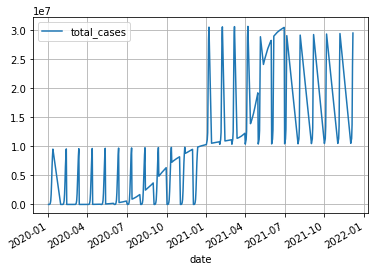

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='India'")[['total_cases']].plot()
plt.grid()

<Figure size 576x576 with 0 Axes>

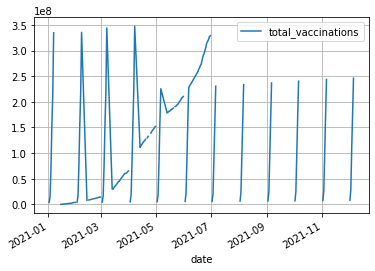

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='India'")[['total_vaccinations']].plot()
plt.grid()

In [ ]:
df_ind_tc = df_n.query("location=='India'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [ ]:
df_ind_tc.isnull().sum()

ds    0
y     0
dtype: int64

In [ ]:
df_ind_tc.head()

ds    y
41447 2020-01-30  1.0
41448 2020-01-31  1.0
41449 2020-01-02  1.0
41450 2020-02-02  2.0
41451 2020-03-02  3.0

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model.fit(df_ind_tc)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
future.tail()

ds
547 2022-01-01
548 2022-01-02
549 2022-01-03
550 2022-01-04
551 2022-01-05

In [ ]:
pred_ind_tc = model.predict(future)

In [ ]:
pred_ind_tc.head()

ds         trend  ...  multiplicative_terms_upper          yhat
0 2020-01-02  1.607715e+06  ...                         0.0  1.352088e+06
1 2020-01-03  1.603133e+06  ...                         0.0  1.368839e+06
2 2020-01-04  1.598551e+06  ...                         0.0  1.686599e+06
3 2020-01-05  1.593969e+06  ...                         0.0  1.972375e+06
4 2020-01-06  1.589387e+06  ...                         0.0  1.554991e+06

[5 rows x 16 columns]

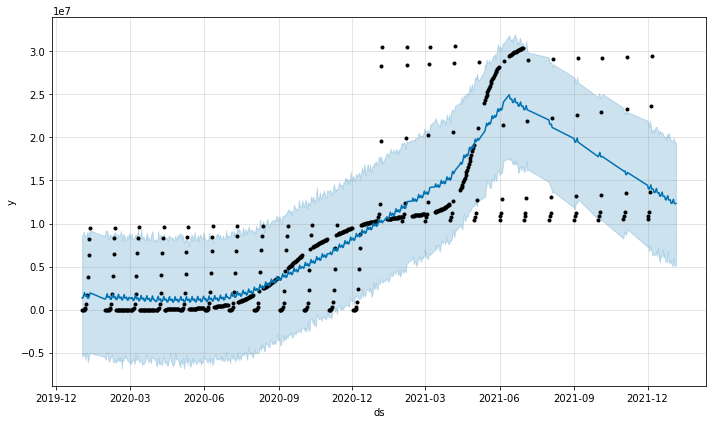

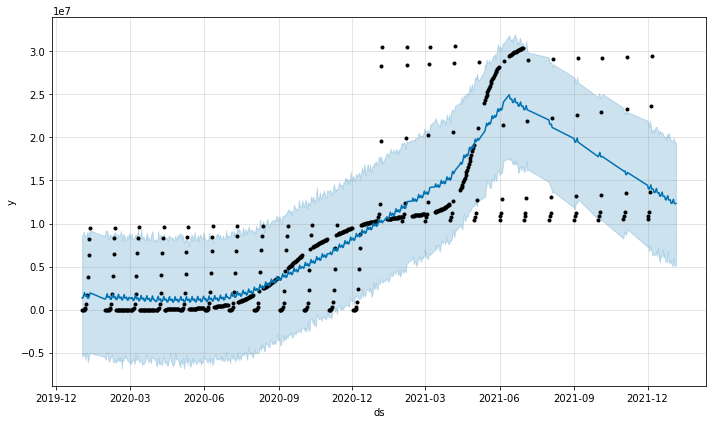

In [ ]:
model.plot(pred_ind_tc)

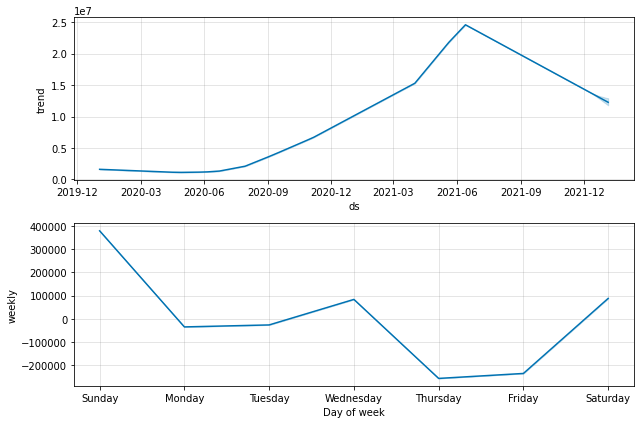

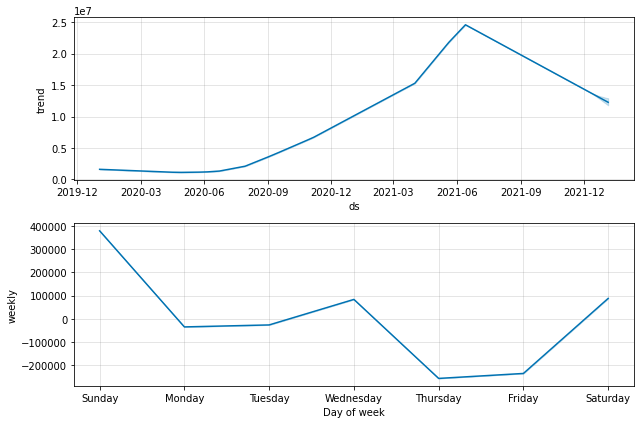

In [ ]:
model.plot_components(pred_ind_tc)

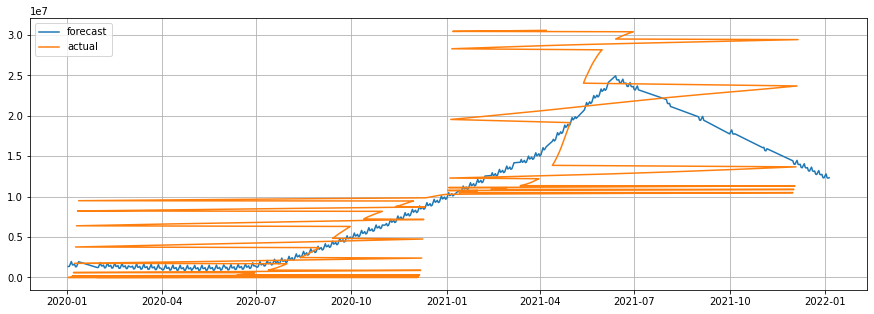

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_ind_tc['ds'],pred_ind_tc['yhat'])
plt.plot(df_ind_tc['ds'],df_ind_tc['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(model, initial='400 days', period='30 days', horizon = '120 days')
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2021-02-09 00:00:00 and 2021-08-08 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
98  116 days  1.928557e+14  1.388725e+07  ...  0.856191  0.631373  0.238095
99  117 days  2.373686e+14  1.540677e+07  ...  0.999994  0.897319  0.226190
100 118 days  2.678143e+14  1.636503e+07  ...  1.081359  0.940145  0.190476
101 119 days  2.797152e+14  1.672469e+07  ...  1.106852  0.940145  0.166667
102 120 days  2.846654e+14  1.687203e+07  ...  1.118604  0.940145  0.166667

[5 rows x 7 columns]

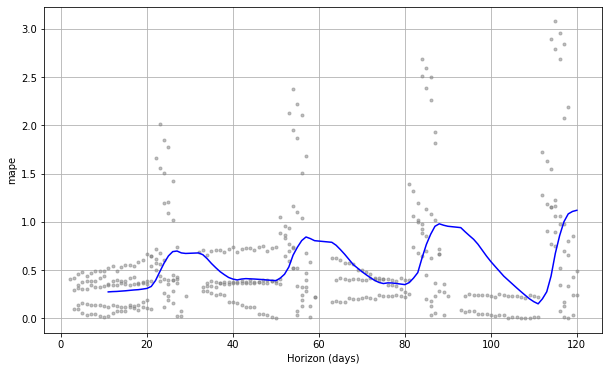

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
df_ind_tv = df_n.query("location=='India'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)

In [ ]:
df_ind_tv.head()

ds   y
41447 2020-01-30 NaN
41448 2020-01-31 NaN
41449 2020-01-02 NaN
41450 2020-02-02 NaN
41451 2020-03-02 NaN

In [ ]:
df_ind_tv1 = df_ind_tv[356:]
df_ind_tv2 = df_ind_tv[:356]

In [ ]:
df_ind_tv2 = df_ind_tv[(df_ind_tv.y.index) > 41797]

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.90)
model.fit(df_ind_tv2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_ind_tv2 = model.predict(future)

In [ ]:
pred_ind_tv2.head()

ds         trend  ...  multiplicative_terms_upper          yhat
0 2021-01-02  3.024893e+07  ...                         0.0  2.514536e+07
1 2021-01-03  3.075697e+07  ...                         0.0  4.258990e+07
2 2021-01-04  3.126501e+07  ...                         0.0  3.298052e+07
3 2021-01-05  3.177305e+07  ...                         0.0  2.901451e+07
4 2021-01-06  3.228108e+07  ...                         0.0  3.988813e+07

[5 rows x 16 columns]

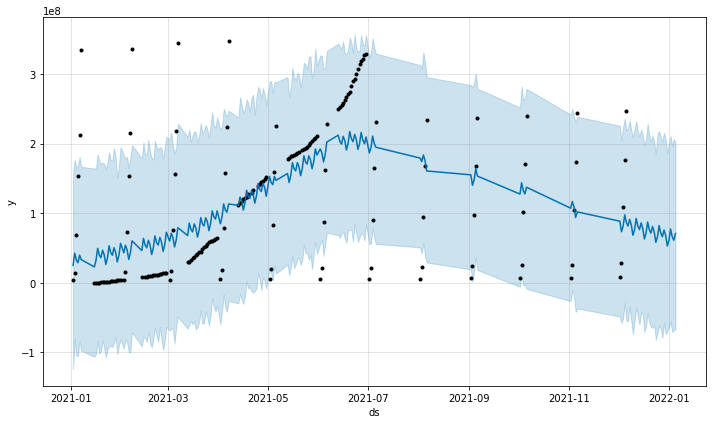

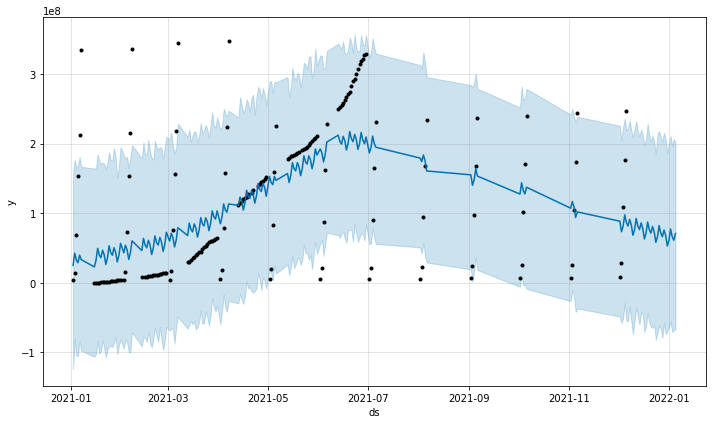

In [ ]:
model.plot(pred_ind_tv2)

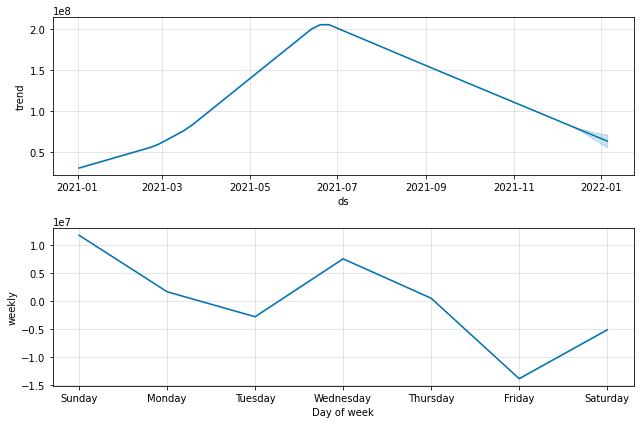

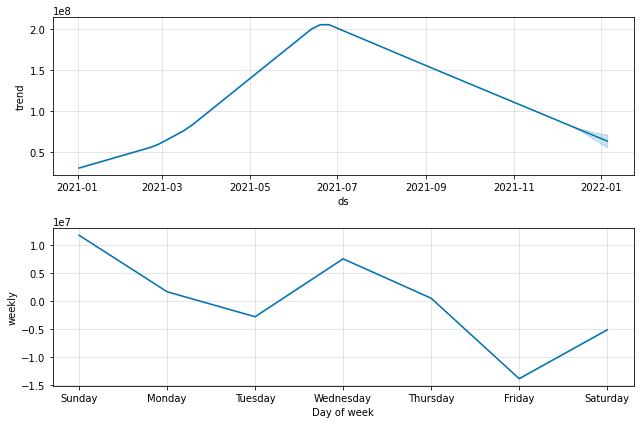

In [ ]:
model.plot_components(pred_ind_tv2)

In [ ]:
df_cv = cross_validation(model, initial='130 days' , period= '15 days' ,  horizon = '30 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 12 forecasts with cutoffs between 2021-05-25 00:00:00 and 2021-11-06 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
21 26 days  1.249373e+16  1.117753e+08  ...  3.983309  2.206246  0.780000
22 27 days  5.545178e+15  7.446595e+07  ...  1.221526  0.559660  0.857143
23 28 days  5.006253e+15  7.075488e+07  ...  0.482054  0.465326  0.942857
24 29 days  1.241089e+16  1.114042e+08  ...  0.526137  0.589772  0.700000
25 30 days  1.924209e+16  1.387159e+08  ...  0.576444  0.673099  0.500000

[5 rows x 7 columns]

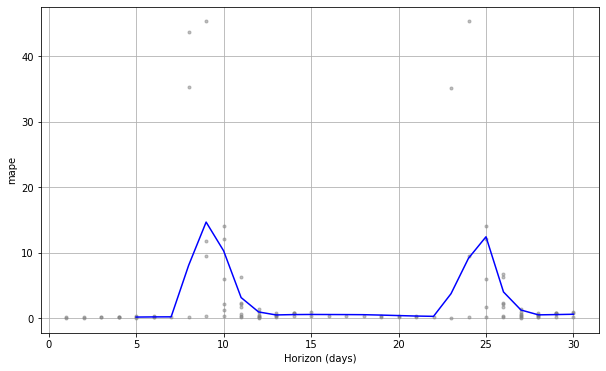

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

# USA

<Figure size 576x576 with 0 Axes>

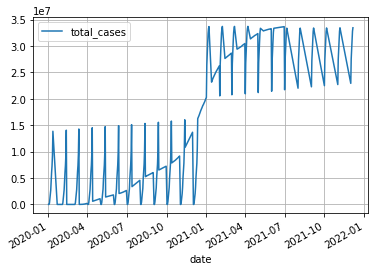

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='United States'")[['total_cases']].plot()
plt.grid()

<Figure size 576x576 with 0 Axes>

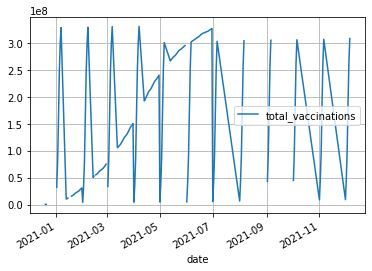

In [ ]:
plt.figure(figsize=(8,8))
df_n.set_index('date').query("location=='United States'")[['total_vaccinations']].plot()
plt.grid()

In [ ]:
df_usa_tc = df_n.query("location=='United States'")[['date','total_cases']].rename({'date':'ds' , 'total_cases':'y'} , axis=1)

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.85)
model.fit(df_usa_tc)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_usa_tc = model.predict(future)

In [ ]:
pred_usa_tc.head()

ds         trend  ...  multiplicative_terms_upper          yhat
0 2020-01-02  2.310736e+06  ...                         0.0  2.127610e+06
1 2020-01-03  2.303313e+06  ...                         0.0  2.107132e+06
2 2020-01-04  2.295889e+06  ...                         0.0  2.413822e+06
3 2020-01-05  2.288465e+06  ...                         0.0  2.676775e+06
4 2020-01-06  2.281042e+06  ...                         0.0  2.116779e+06

[5 rows x 16 columns]

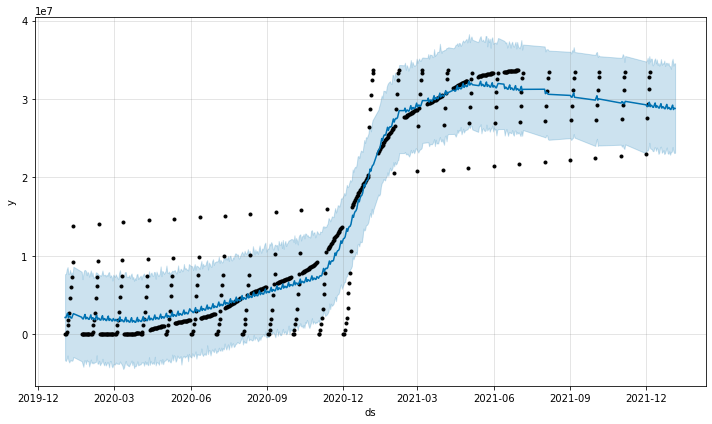

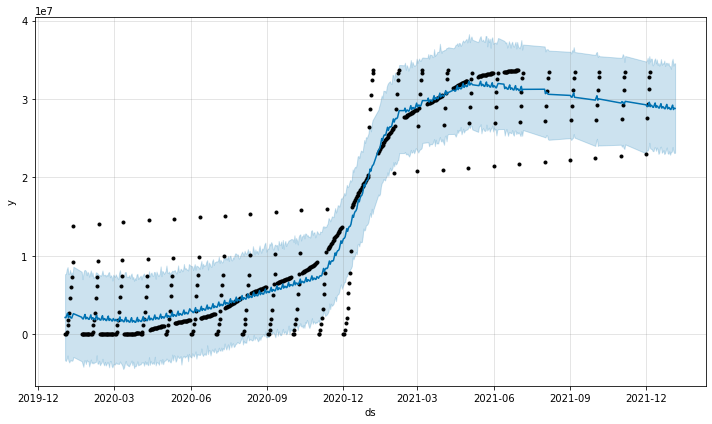

In [ ]:
model.plot(pred_usa_tc)

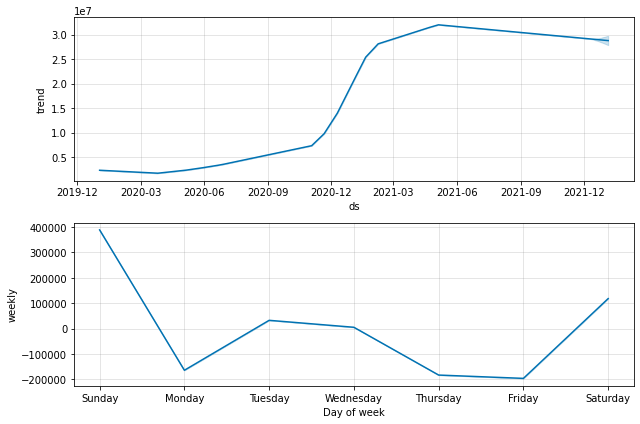

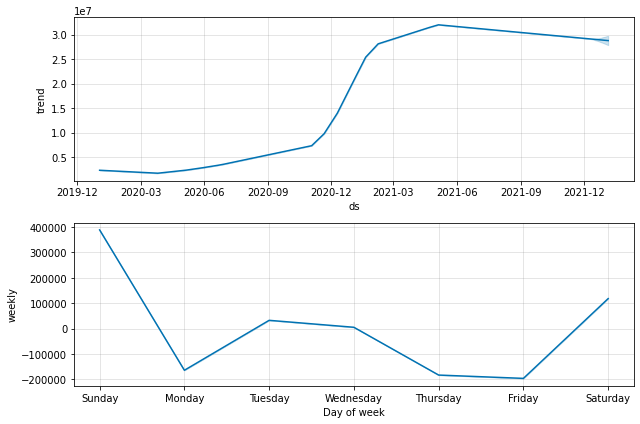

In [ ]:
model.plot_components(pred_usa_tc)

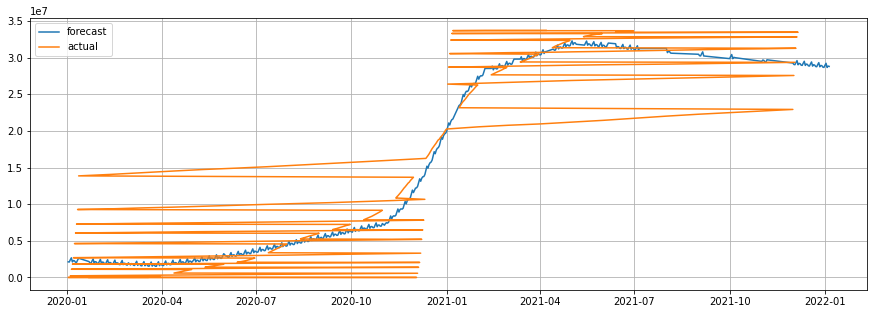

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(pred_usa_tc['ds'],pred_usa_tc['yhat'])
plt.plot(df_usa_tc['ds'],df_usa_tc['y'])
plt.grid()
plt.legend(labels=['forecast','actual'])

In [ ]:
df_cv = cross_validation(model, initial='400 days', period='30 days', horizon = '120 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2021-02-09 00:00:00 and 2021-08-08 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
98  116 days  5.766366e+14  2.401326e+07  ...  0.729433  0.588723  0.214286
99  117 days  5.137549e+14  2.266616e+07  ...  0.668527  0.570235  0.333333
100 118 days  4.370784e+14  2.090642e+07  ...  0.594578  0.520524  0.452381
101 119 days  3.713838e+14  1.927132e+07  ...  0.528528  0.364746  0.547619
102 120 days  3.380451e+14  1.838600e+07  ...  0.495079  0.304207  0.595238

[5 rows x 7 columns]

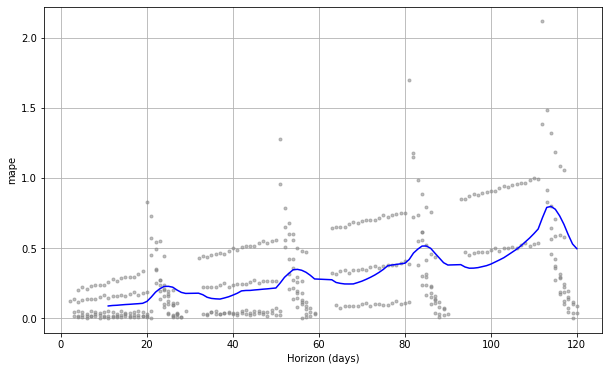

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
df_usa_tv = df_n.query("location=='United States'")[['date','total_vaccinations']].rename({'date':'ds' , 'total_vaccinations':'y'} , axis=1)

In [ ]:
df_usa_tv1 = df_usa_tv[:348]

In [ ]:
df_usa_tv2 = df_usa_tv[(df_usa_tv.y.index) > 95281]

In [ ]:
model = Prophet(interval_width=0.90 , changepoint_prior_scale=0.5 , changepoint_range=0.80)
model.fit(df_usa_tv2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = model.make_future_dataframe(periods=30)

In [ ]:
pred_usa_tv = model.predict(future)

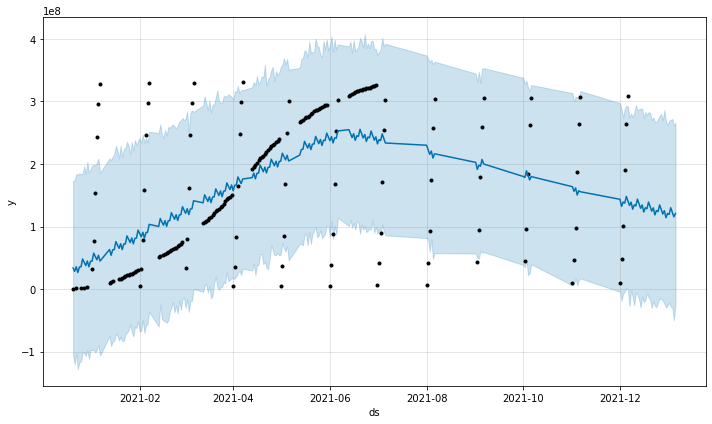

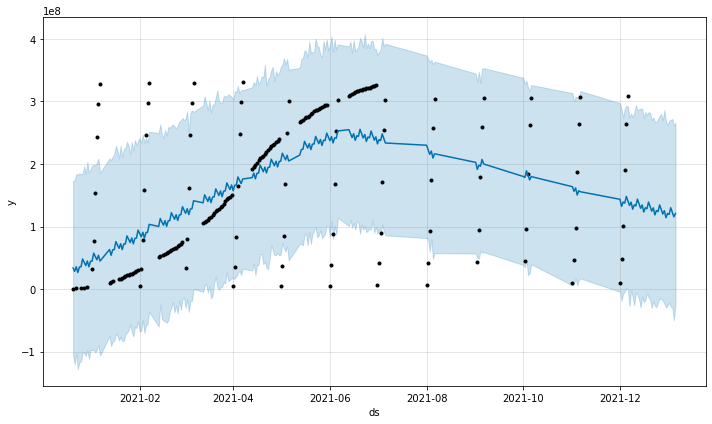

In [ ]:
model.plot(pred_usa_tv)

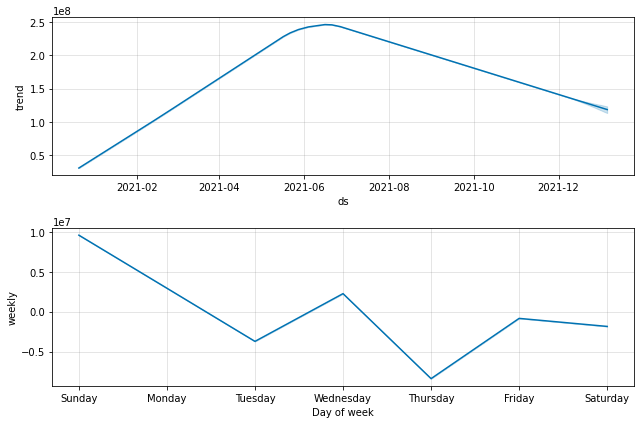

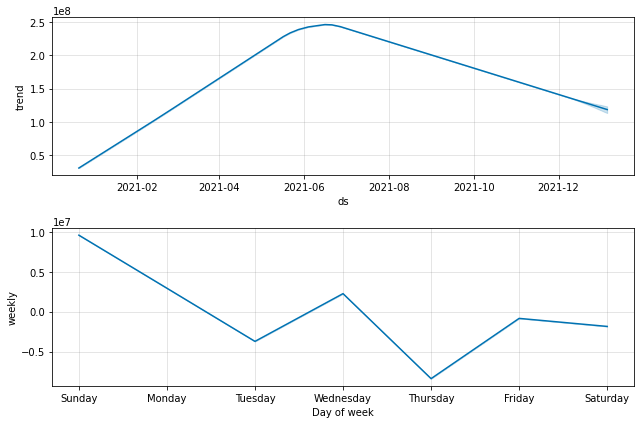

In [ ]:
model.plot_components(pred_usa_tv)

In [ ]:
df_cv = cross_validation(model, initial='150 days' , period= '15 days' ,  horizon = '40 days')
df_p = performance_metrics(df_cv)
df_p.tail()

INFO:fbprophet:Making 11 forecasts with cutoffs between 2021-05-30 00:00:00 and 2021-10-27 00:00:00


horizon           mse          rmse  ...      mape     mdape  coverage
32 36 days  3.520693e+16  1.876351e+08  ...  4.136562  2.589332  0.538462
33 37 days  1.627072e+16  1.275567e+08  ...  1.298293  0.885525  0.730769
34 38 days  9.319828e+15  9.653926e+07  ...  0.501986  0.368782  0.871795
35 39 days  9.389418e+15  9.689901e+07  ...  0.367195  0.368782  0.871795
36 40 days  1.364664e+16  1.168188e+08  ...  0.407390  0.411061  0.743590

[5 rows x 7 columns]

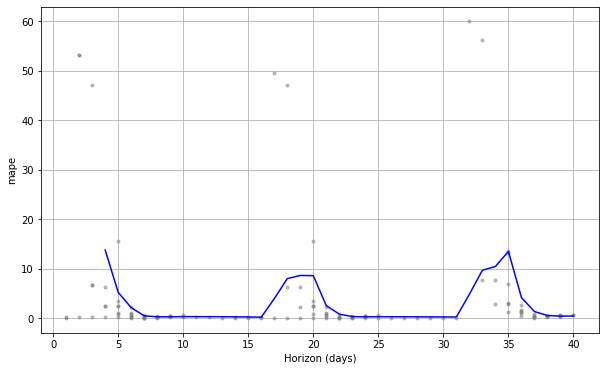

In [ ]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

**THANK U**

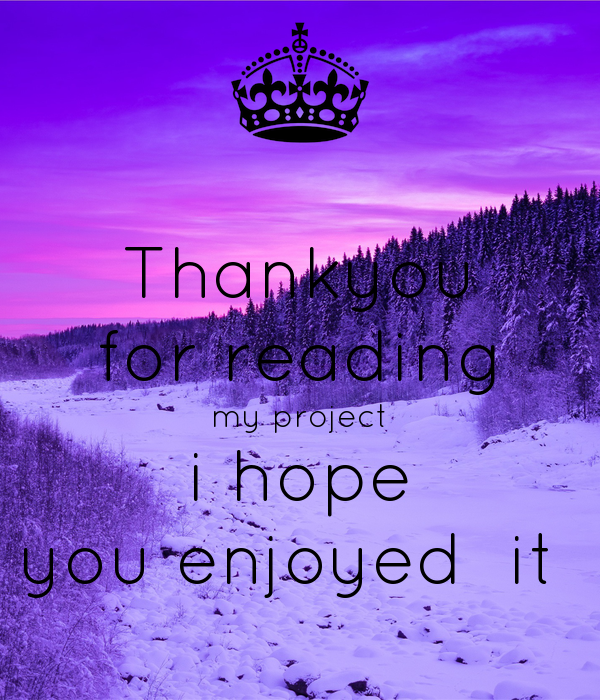